# Notebook in Research Environment

#### Considering outline for creating Machine Learning Pipeline

1. **`Data Analysis`**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring

## `Target:` Predicting Sale Price of Houses
Aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses.

### Importance?
Predicting house prices is useful to identify fruitful investments or to determine whether the price advertised for a house is over or under-estimated.

### Objective of machine learning model?
We aim to minimise difference between real price and price estimated by our model. 

Our Evaluate metrices wiil be:

1. mean squared error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).

In [142]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [143]:
path = 'advanced-regression/'
# load dataset
data = pd.read_csv(path+'train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [144]:
# drop id, it is just a number given to identify each house
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

**`Observation:`**
House price dataset contains 1460 rows i.e.(houses) and 80 columns i.e.(variables)

* 79 are predictive variables
* 1 is target variable: `SalePrice`

# > Data Analysis

I will analyse:

1. Target variable

2. Variable types (categorical and numerical)

3. Missing data

4. Numerical variables
    * Discrete
    * Continuous
    * Distributions
    * Transformations
5. Categorical variables
    * Cardinality
    * Rare Labels
    * Special mappings


### 1. Target Variable

Exploring target distribution

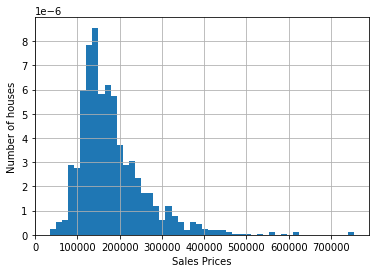

In [145]:
#using hist to see target distribution
data['SalePrice'].hist(bins=50,density=True)
plt.xlabel('Sales Prices')
plt.ylabel('Number of houses')
plt.show()

**`Observation:`**

* Target is continuous, and distribution is right skewed
* Let's Improve value spread with mathematical transformation i.e. (log)

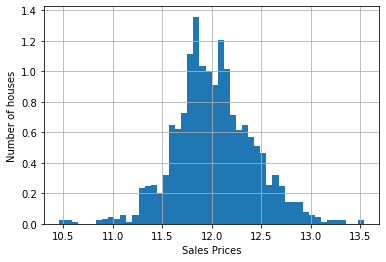

In [146]:
np.log(data['SalePrice']).hist(bins=50,density=True)
plt.xlabel('Sales Prices')
plt.ylabel('Number of houses')
plt.show()

Distribution is now Gaussion

### 2. Variable Types
Let's identify and Explore 
* categorical and 
* numerical variables



In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [148]:
#Categorical Variables hunt : "object"

cat_vars = [feature for feature in data.columns if data[feature].dtype=='O']
cat_vars = cat_vars + ['MSSubClass']
print(len(cat_vars),'\n',cat_vars)

44 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [149]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [150]:
num_vars = [feature for feature in data.columns if feature not in cat_vars and feature != 'SalePrice']
print(len(num_vars),'\n',num_vars)

35 
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### 3. Missing values

Let's identify if data have missing values

In [151]:
#list of variables contain missing values
vars_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0]

#missing value %
data[vars_with_na].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

**`Observation:`**

Last 4 features have more than 70% of missing values
* Some other variables also have small percentage of missing observations

Let's plot missing value %

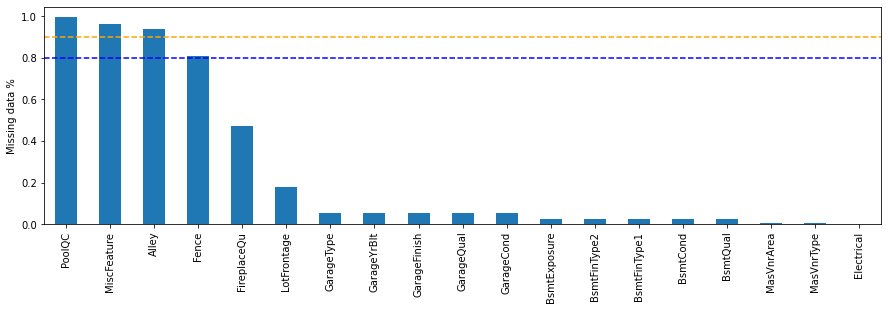

In [152]:
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(15,4))

plt.ylabel('Missing data %')
plt.axhline(y=0.90, color='orange', linestyle='--')
plt.axhline(y=0.80, color='b', linestyle='--')

plt.show()

In [153]:
# which variables with missing data are numerical and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Categorical variables with na(number): ', len(cat_na),'\n',cat_na,'\n')
print('Numerical variables with na(number): ', len(num_na),'\n',num_na)

Categorical variables with na(number):  16 
 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 

Numerical variables with na(number):  3 
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


### 3.1. Target and Missing Data Relationship

Evaluating price of house in those observations where information is missing
* I will do this for each variable that shows missing data

In [154]:
def analyse_na_value(df,var):
    df = df.copy()
    
    # preparing an interim variable that indicates 1 if observation is missing or 0 otherwise
    df[var] = np.where(df[var].isnull(),1,0)
    
    """
    I am thinking to compare median SalePrice in observations where data is missing vs
    observations where data is available
    """
    tmp = df.groupby(var)['SalePrice'].agg(['mean','std'])
    
    #plotting tmp
    #plt.figure(figsize=(10,4))
    tmp.plot(kind="barh", y="mean",legend=False,xerr="std",
             title="Sale Price",color='orange',figsize=(18,4))
    plt.show()

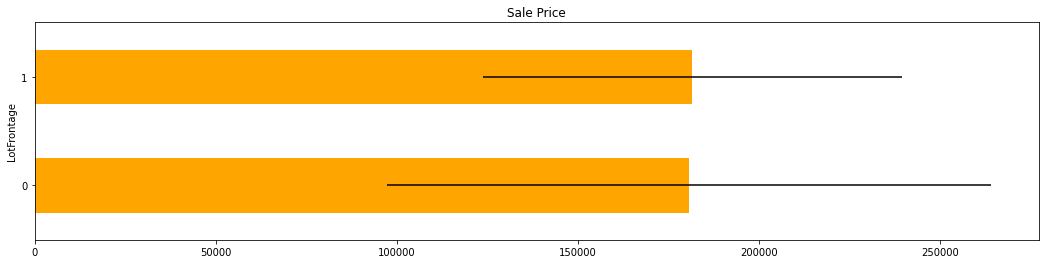

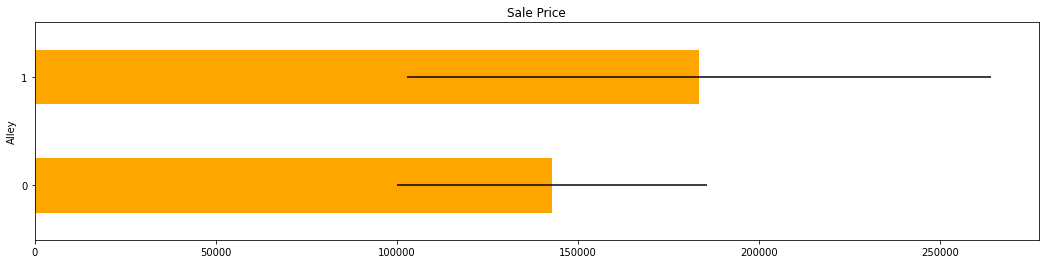

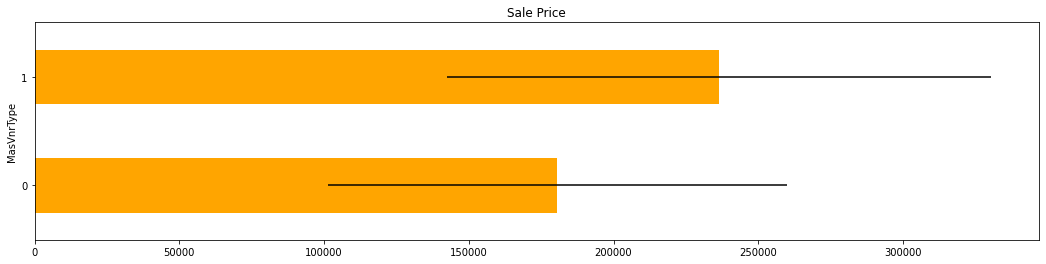

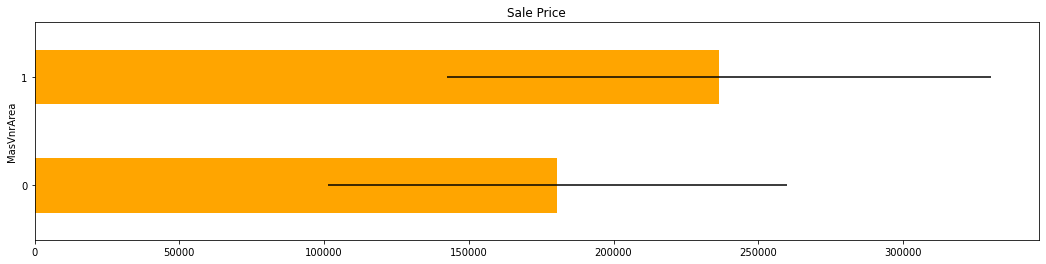

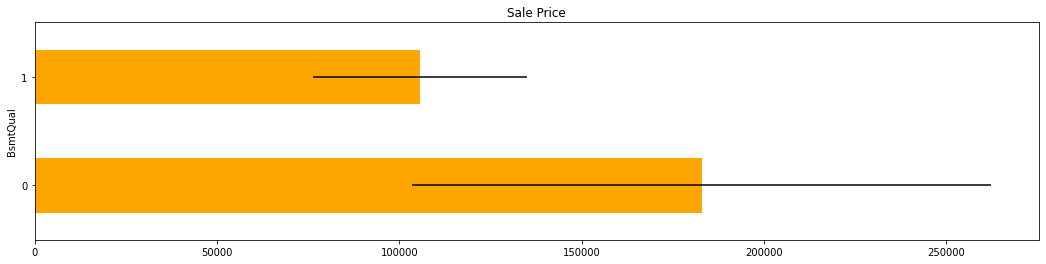

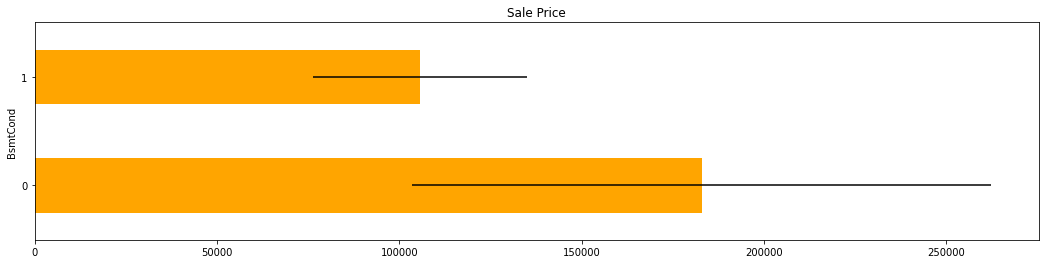

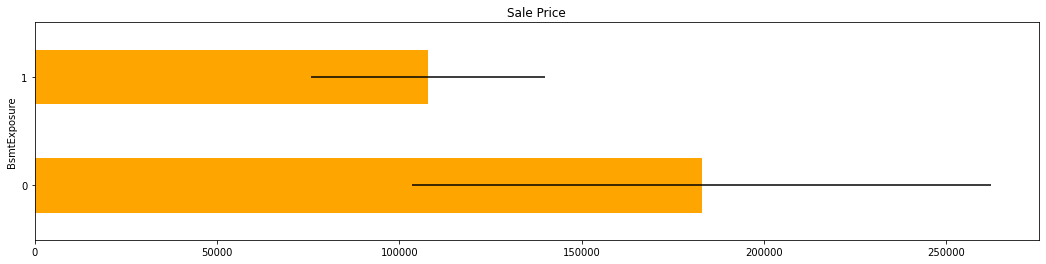

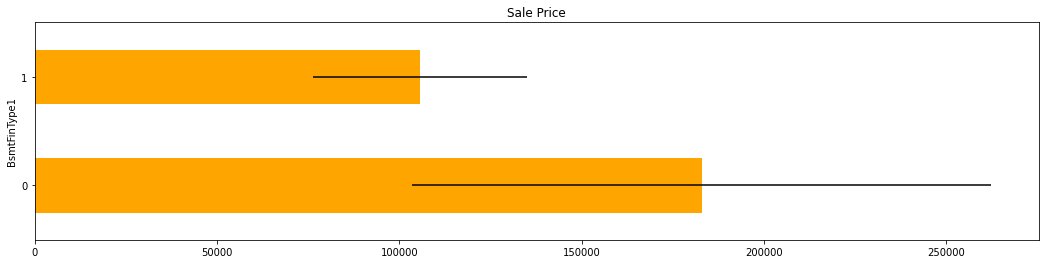

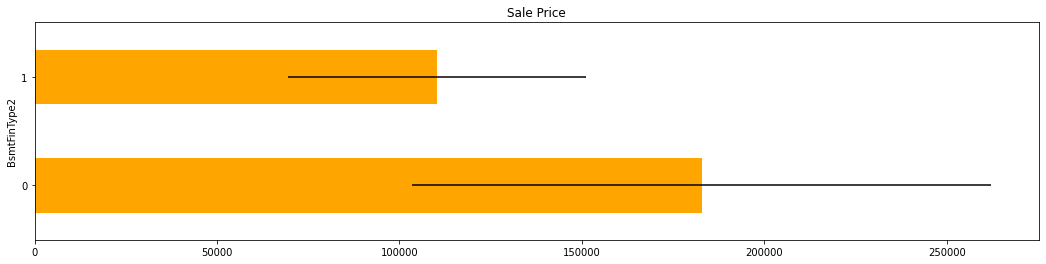

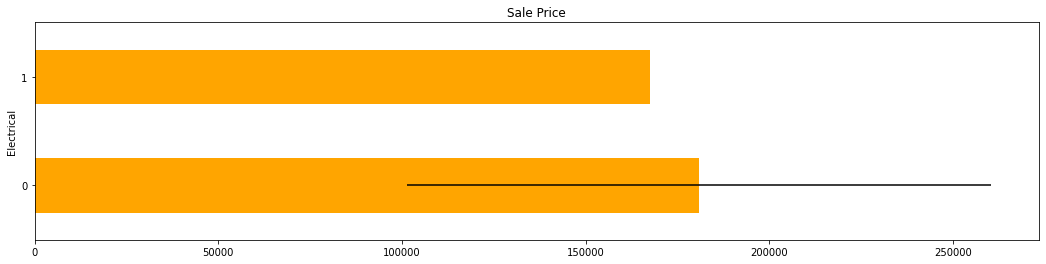

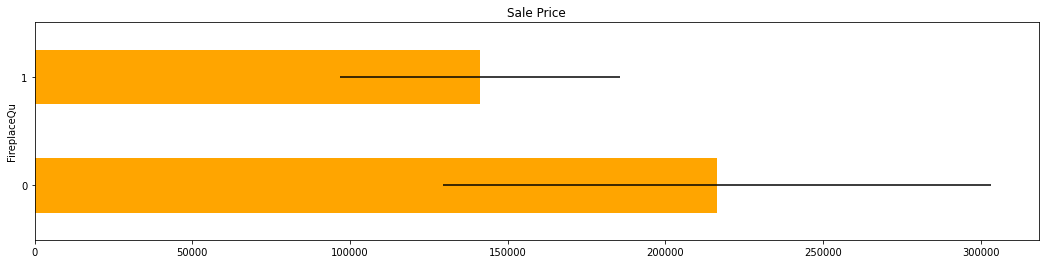

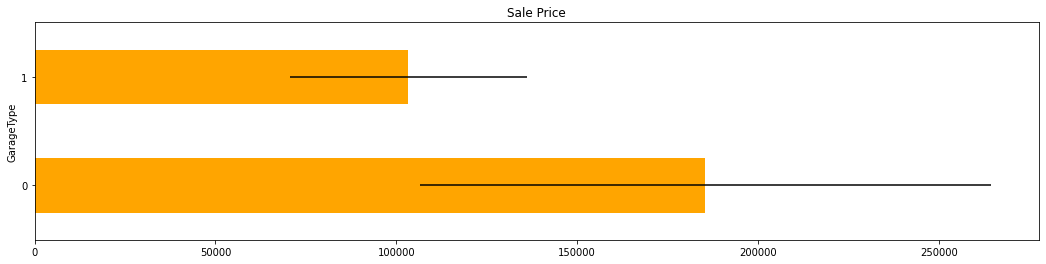

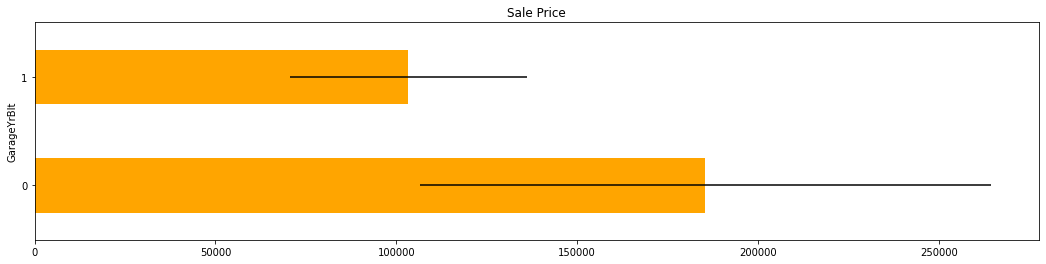

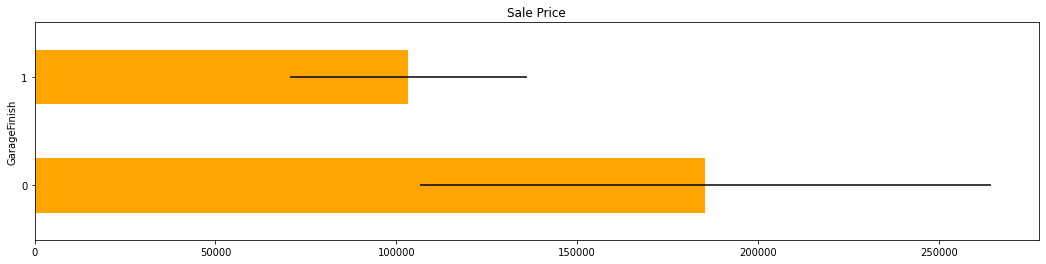

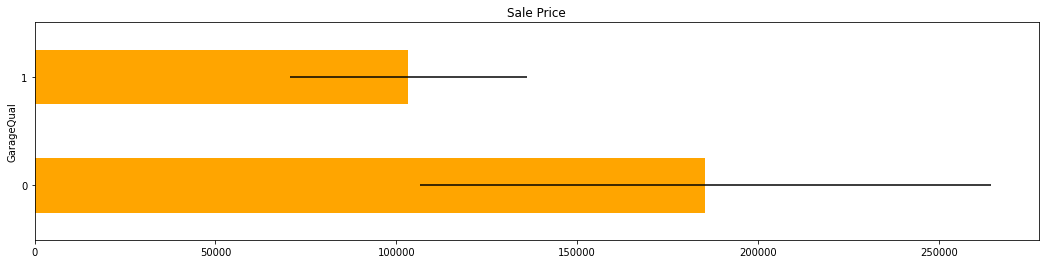

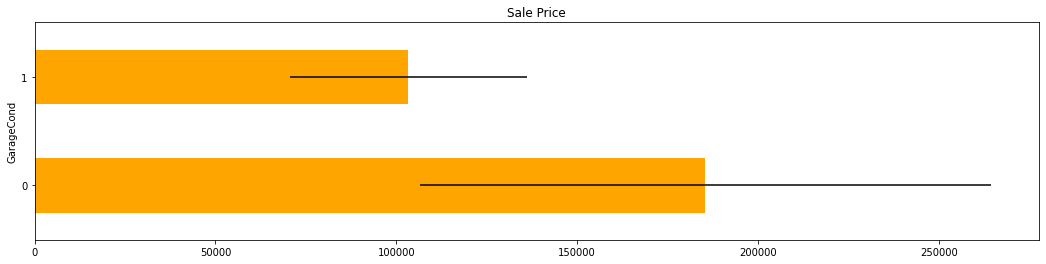

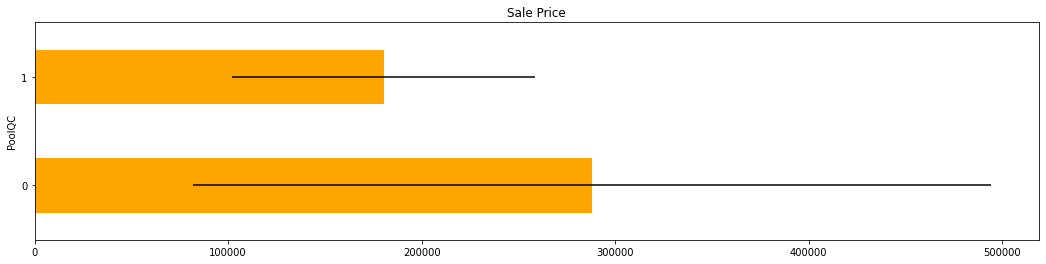

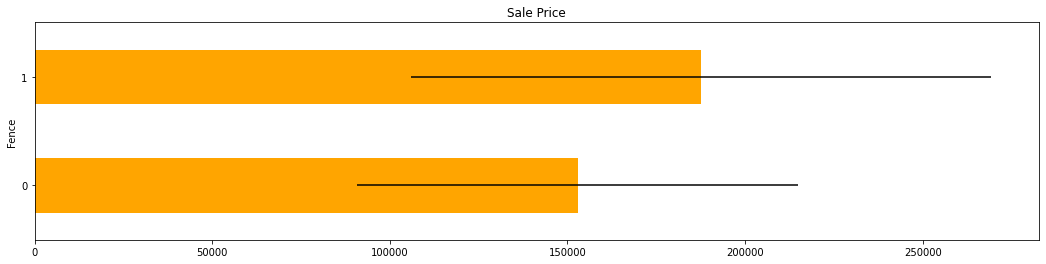

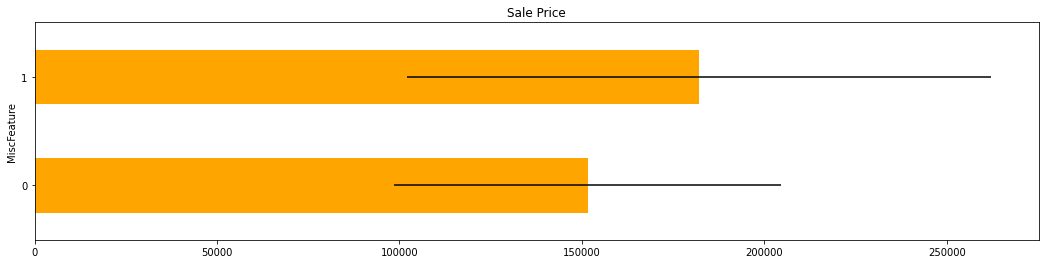

In [155]:
# using abve function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(data,var)

**`Observation:`**

In some variables average Sale Price in houses where information is missing, differs from average Sale Price in houses where information exists
* This suggests that data being missing could be a good predictor of Sale Price

### 4. Numerical variables

* Discrete
* Continuous
* Distributions
* Transformations

In [156]:
#see numerical variables I have in this dataset
print(f'Number of numerical variables:{len(num_vars)}','\n')

data[num_vars].tail()

Number of numerical variables:35 



LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
1455         0.0           0           0        953          953       953   
1456       119.0         790         163        589         1542      2073   
1457         0.0         275           0        877         1152      1188   
1458         0.0          49        1029          0         1078      1078   
1459         0.0         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1455       1999.0           2         460           0           40   
1456       1978.0           2         500         349            0   
1457       1941.0           1         252           0           60   
1458       1950.0           1         240         366            0   
1459       1965.0           1         276         736           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
1455              0          0            0         0        0       8    2007  
1456              0          0            0         0        0       2    2010  
1457              0          0            0         0     2500       5    2010  
1458            112          0            0         0        0       4    2010  
1459              0          0            0         0        0       6    2008

### Exploring Dates Variables

We have 4 Date variables in dataset:

1. **`YearBuilt`:** year in which house was built
2. **`YearRemodAdd`:** year in which house was remodeled
3. **`GarageYrBlt`:** year in which a garage was built
4. **`YrSold`:** year in which house was sold

Let's extract information I will capture difference in years between year, house was built and year house was sold

In [157]:
year_vars = [feature for feature in num_vars if 'Yr' in feature or 'Year' in feature]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [158]:
#unique years in each Feature
for feature in year_vars:
    print(feature,'\n', data[feature].unique())
    print()

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 196

### 4.1. Target and Year Data Relationship

Let's explore evolution of target(SalePrice) with years in which house was sold

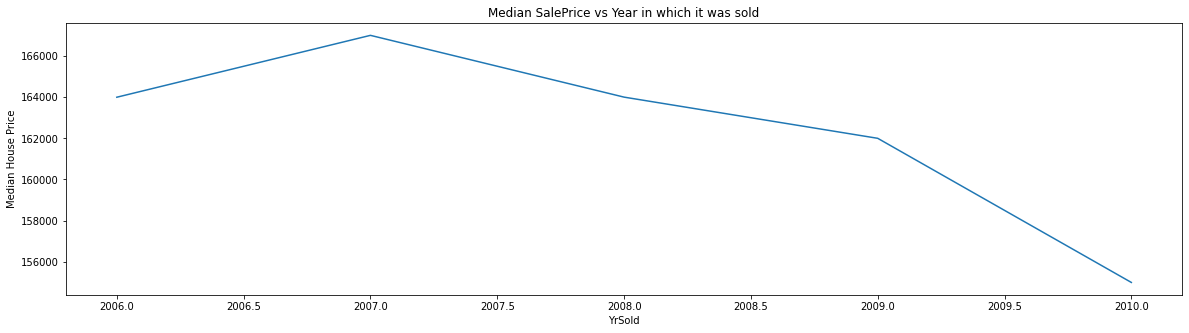

In [159]:
#median sale price vs year in which it was sold

plt.figure(figsize=(20,5))
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Median SalePrice vs Year in which it was sold')
plt.show()

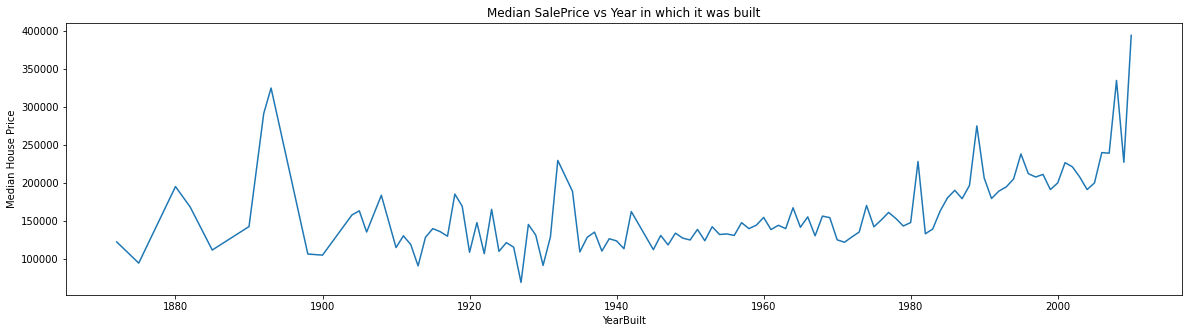

In [160]:
#median sale price vs year in which it was built

plt.figure(figsize=(20,5))
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Median SalePrice vs Year in which it was built')
plt.show()

**`Observation:`**

Newly built houses tend to be more expensive
* Could it be that lately older houses were sold? Let's have a look at that

`Let's Capture elapsed years between Year variables and year in which house was sold`

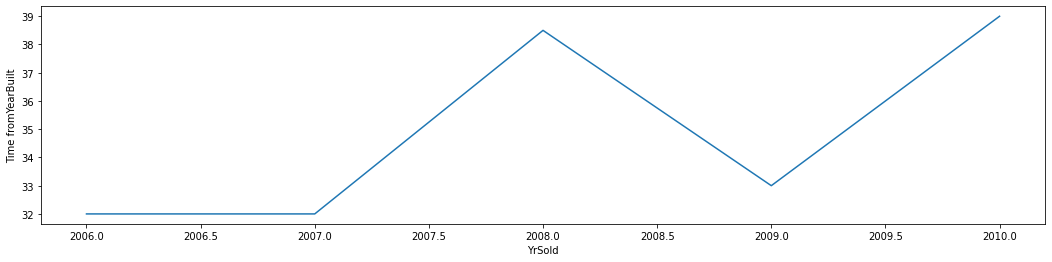

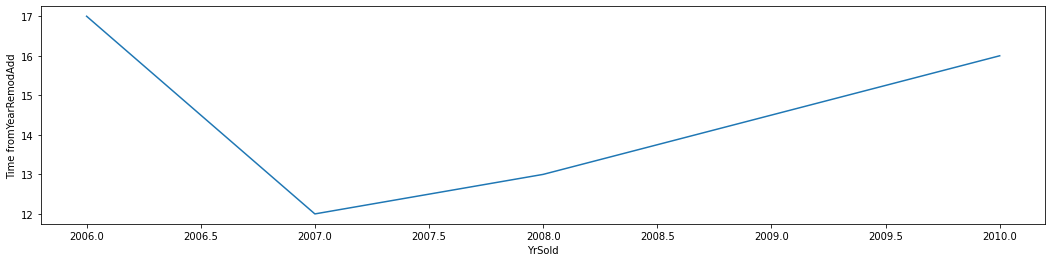

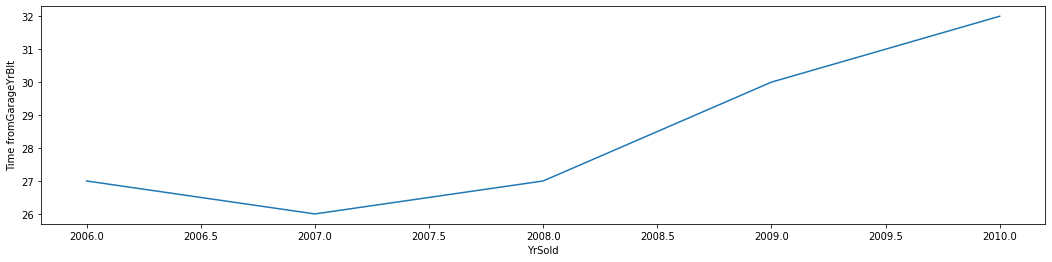

In [161]:
def analyse_year_vars(df,var):
    df = df.copy()
    """
    Capturing difference between a year variable and year in which house was sold
    """
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot(figsize=(18,4))
    plt.ylabel('Time from'+var)
    plt.show()
    
for feature in year_vars:
    if feature !='YrSold':
        analyse_year_vars(data, feature)

**`Observation:`**
Towards 2010 houses sold had older garages, and had not been remodelled recently, that might explain why we see cheaper sales prices in recent years, at least in this dataset

* `Let's plot instead time since last remodelled, or time since built, and sale price, to see if there is a relationship`

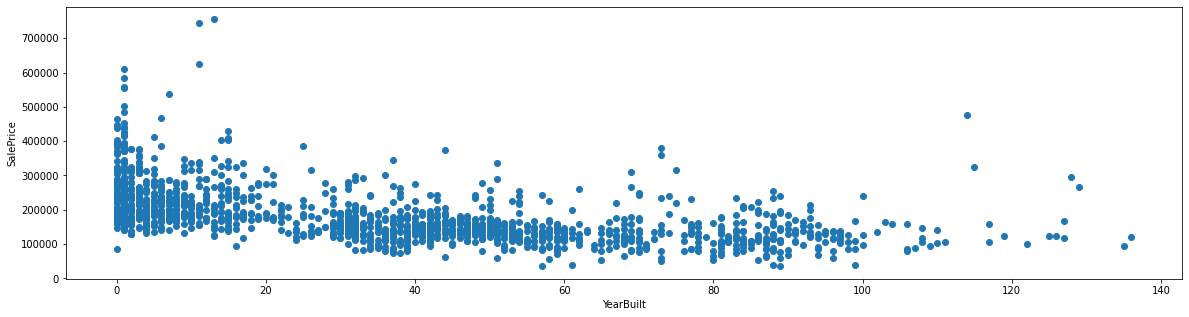

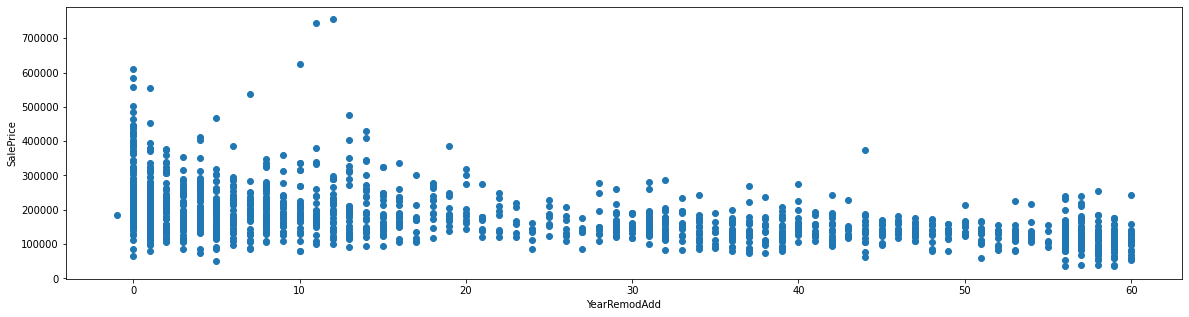

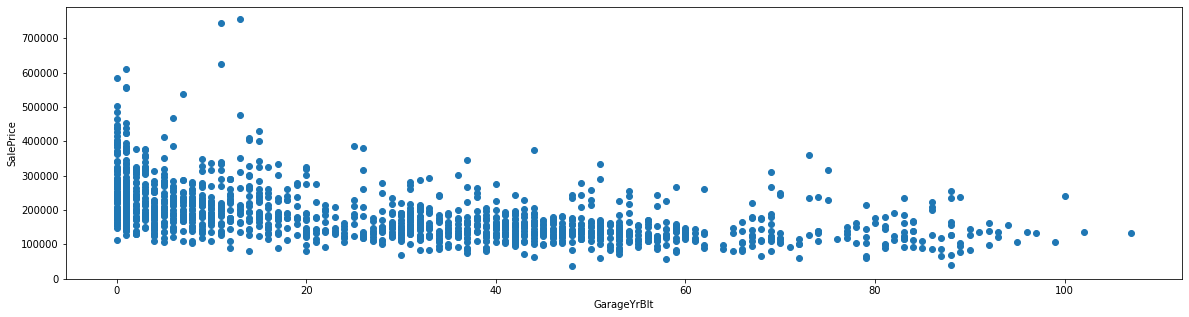

In [162]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    """
    Capturing difference between a year variable and year in which house was sold
    """
    df[var] = df['YrSold'] - df[var]
    plt.figure(figsize=(20,5))
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

**`Observation:`**
Tendency to a decrease in price, with older houses can be seen
* longer the time between house was built or remodeled and sale date, lower the sale Price

This makes sense, cause this means that house will have an older look, and potentially needs repairs

### 4.2. Discrete variables

Exploring which variables are discrete i.e., showing a finite number of values

In [163]:
#list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars]

print('Number of discrete variables: ',len(discrete_vars))

Number of discrete variables:  13


In [164]:
#visualising discrete variables

data[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

These discrete variables tend to be 
* qualifications (Qual) or 
* grading scales (Cond), or refer to number of rooms, or 
* units (FullBath, GarageCars), or indicate area of room (KitchenAbvGr)

We expect higher prices, with bigger numbers

**`Let's go ahead and analyse their contribution to house price`**

* MoSold is month in which house was sold

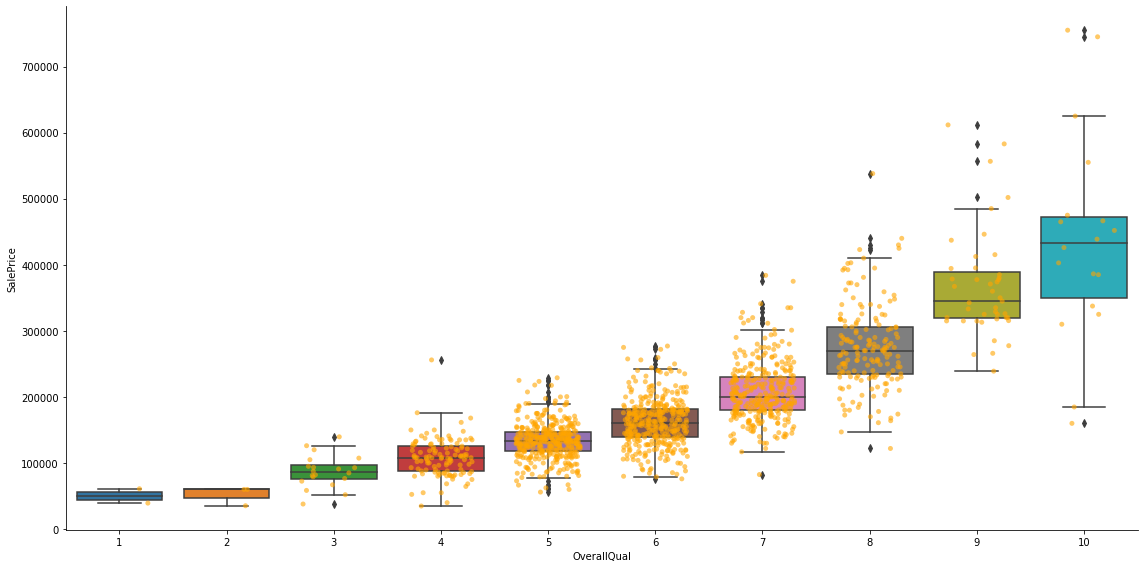

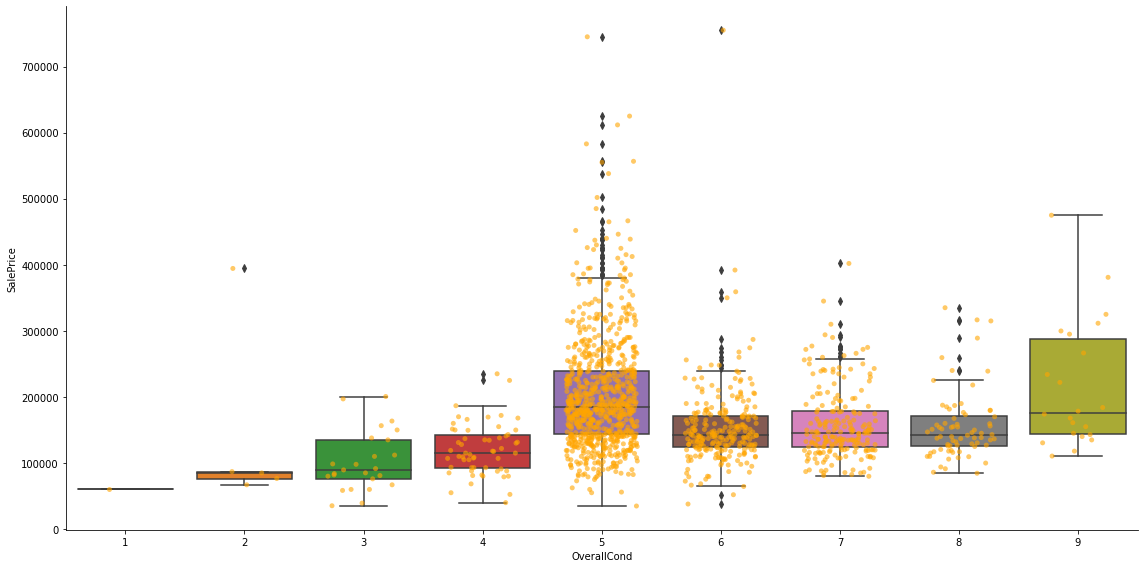

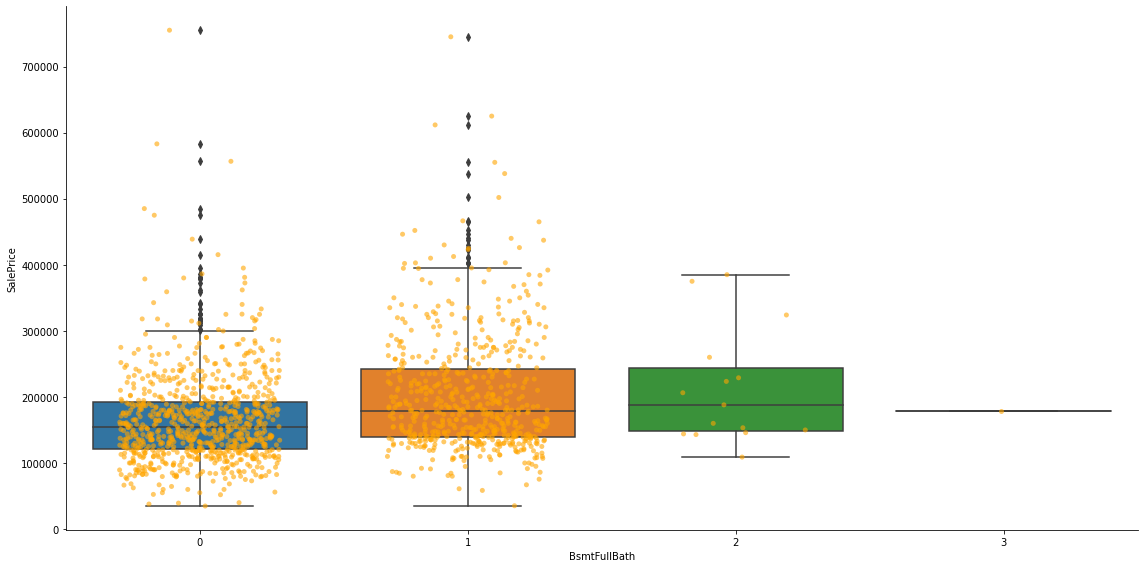

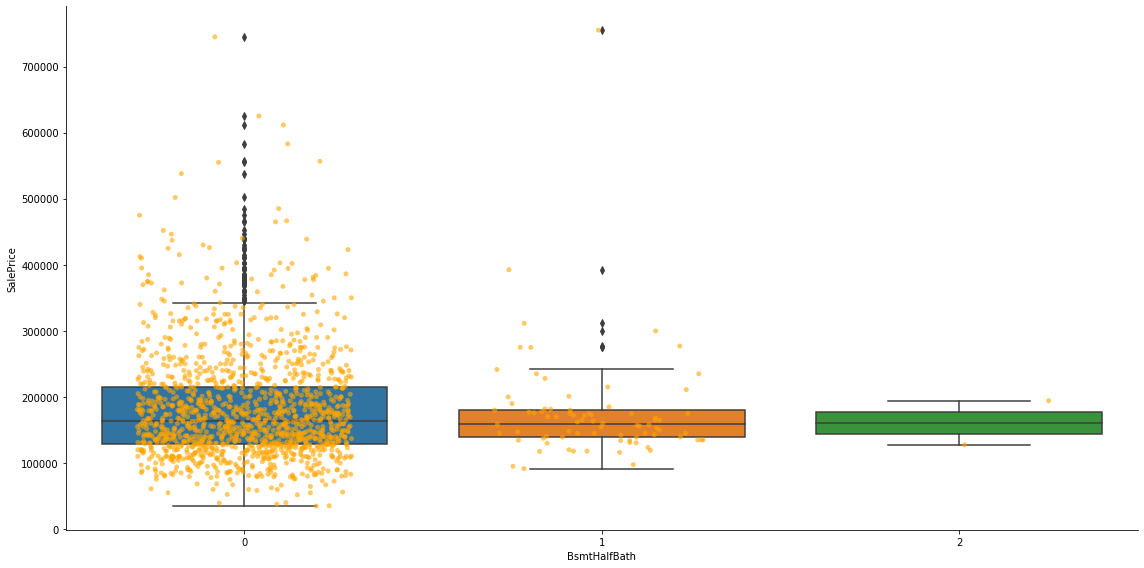

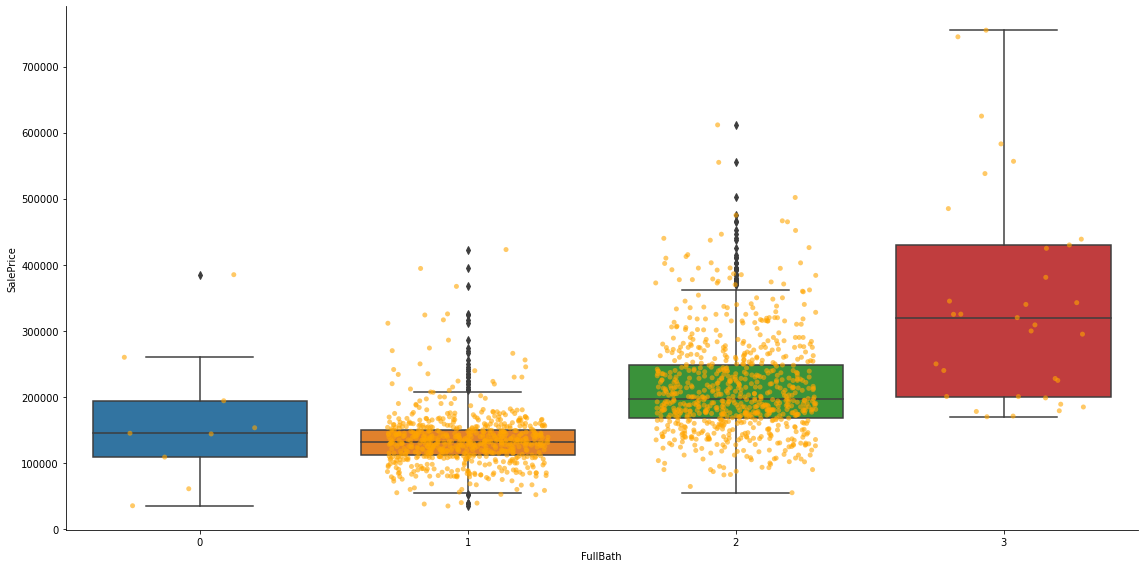

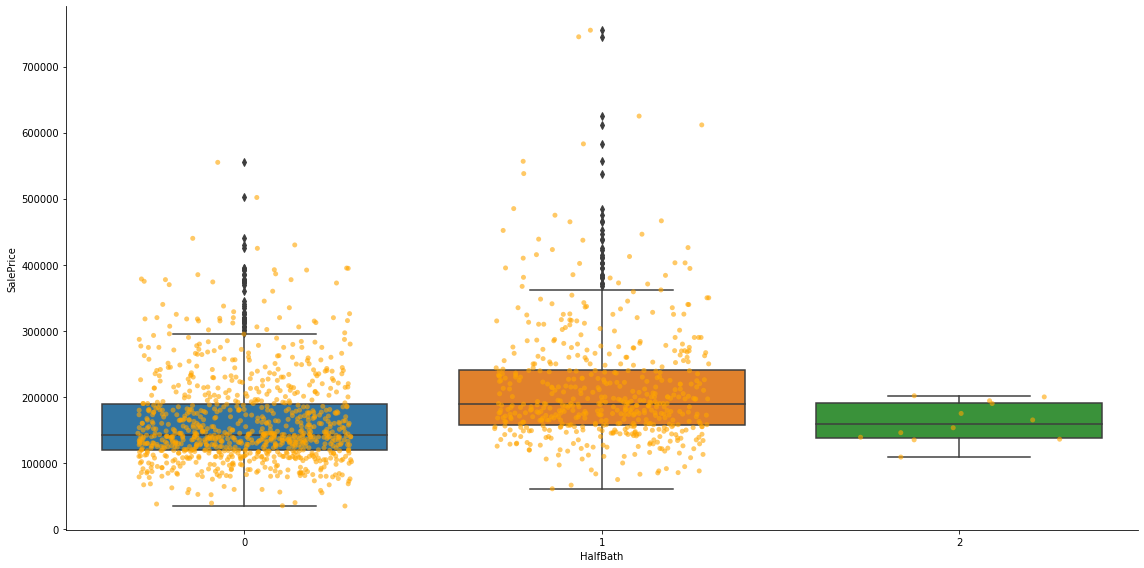

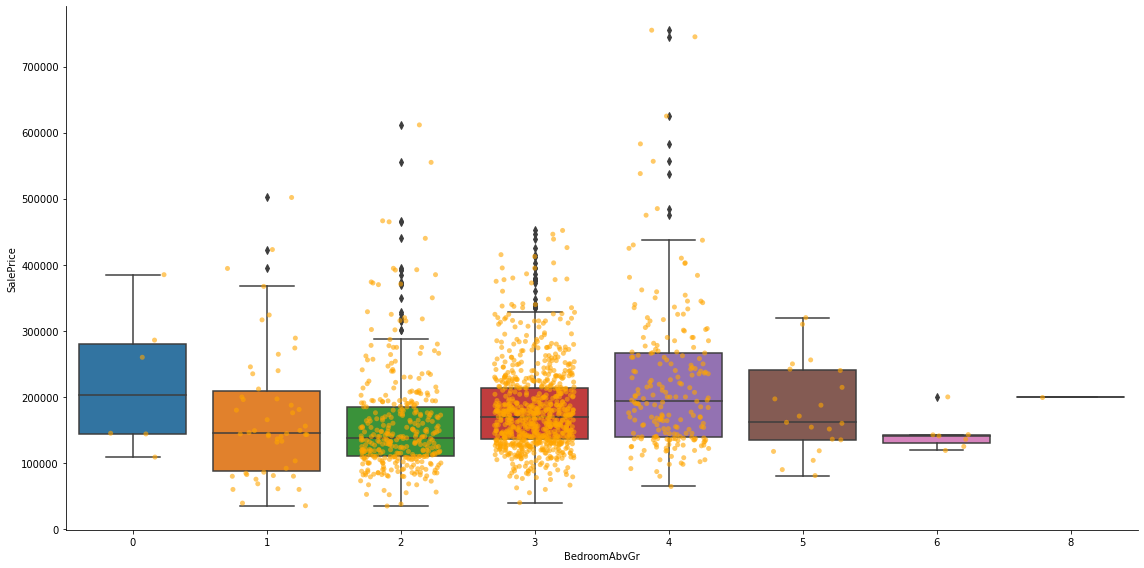

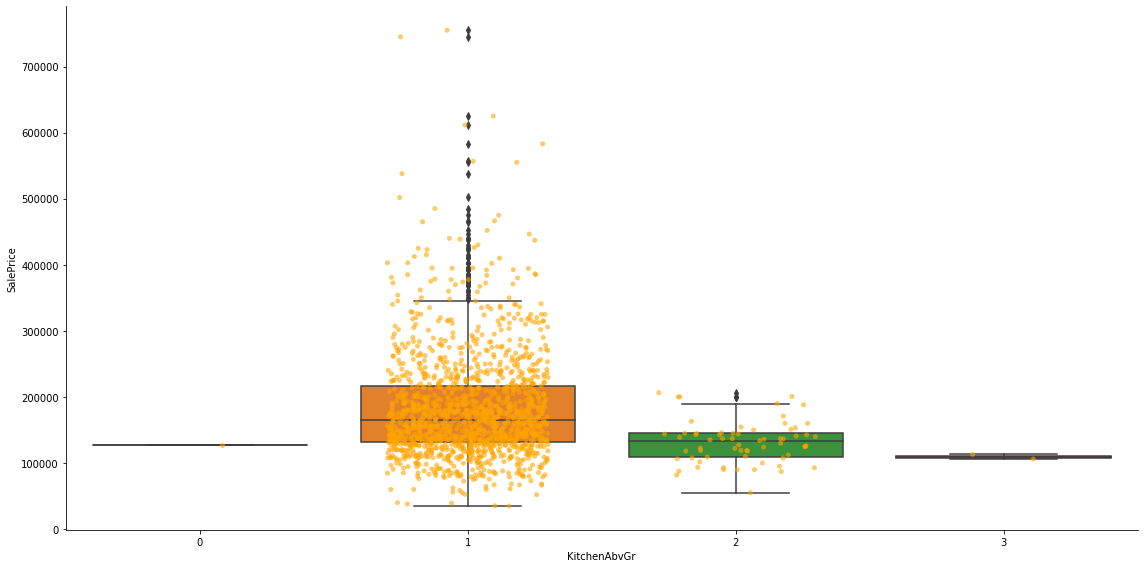

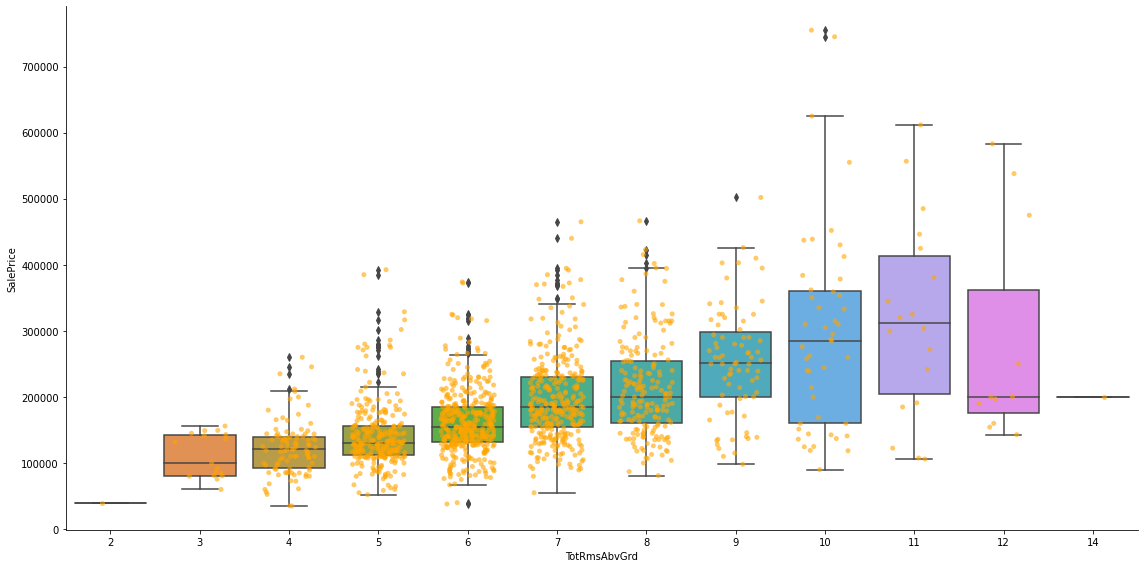

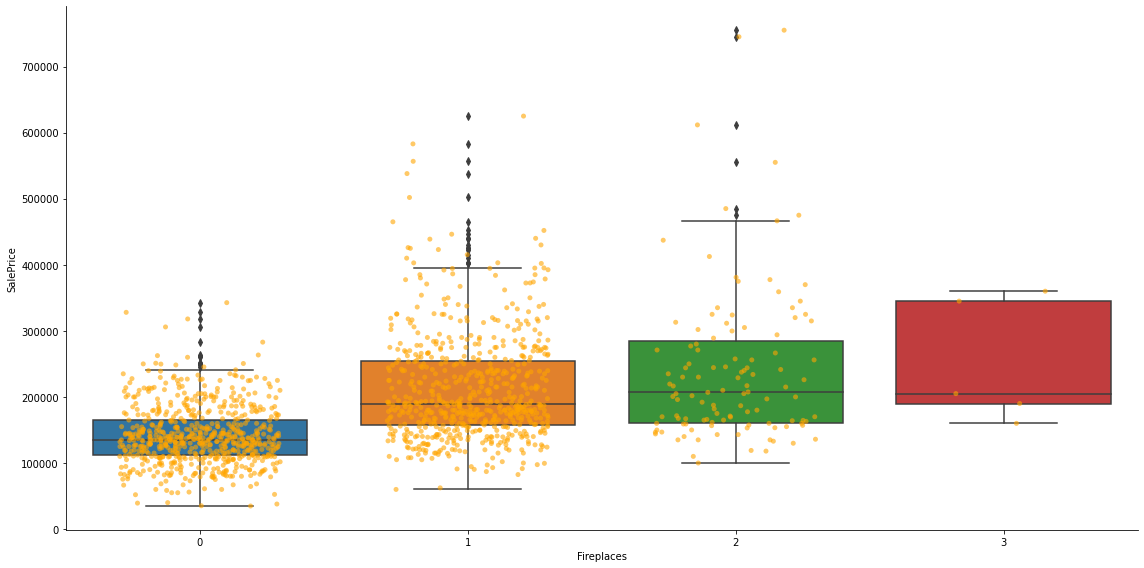

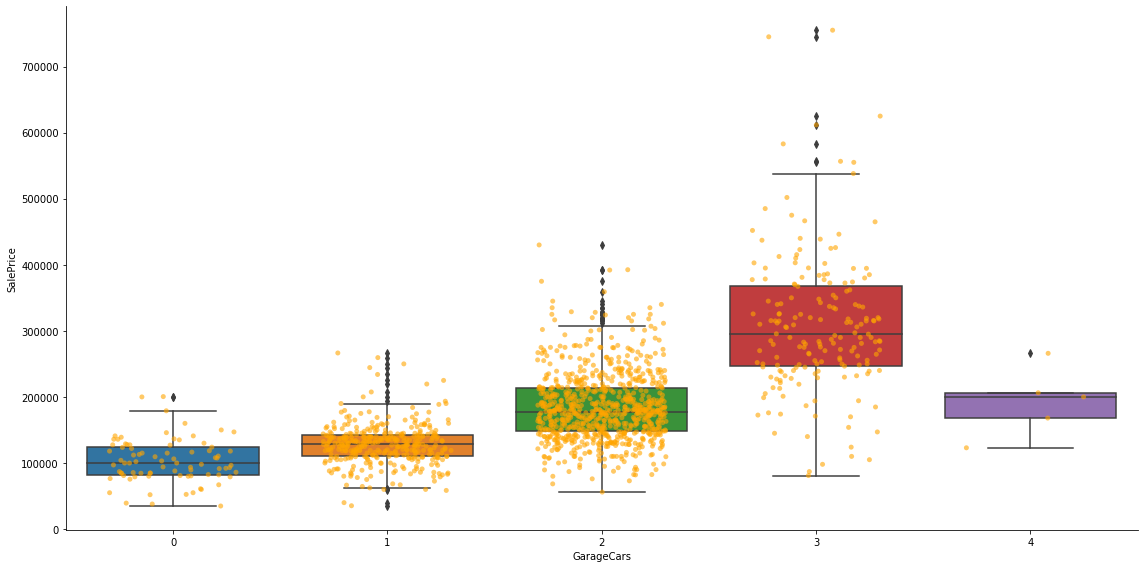

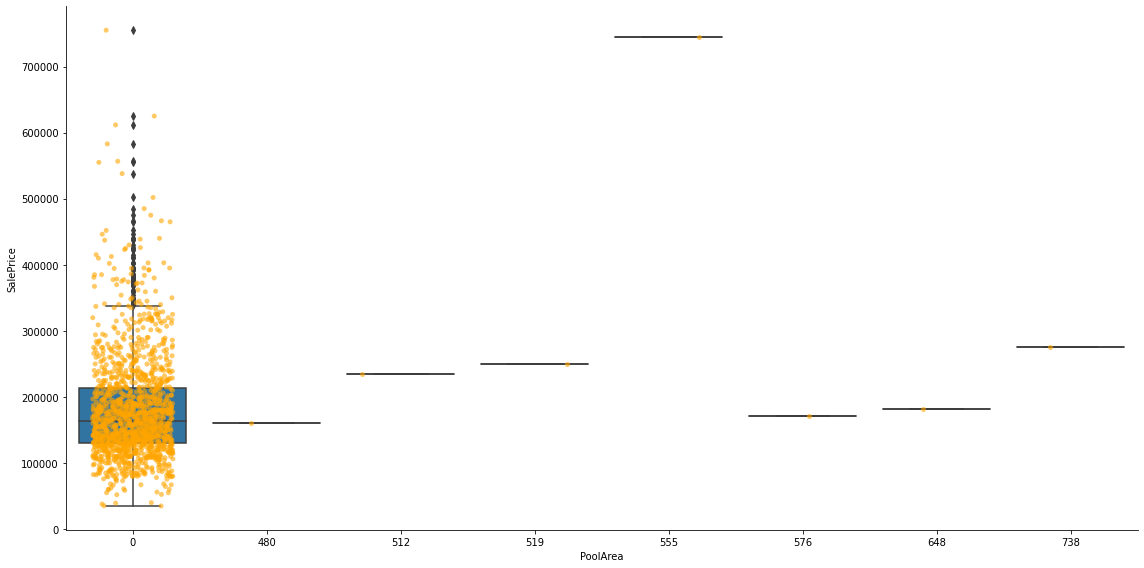

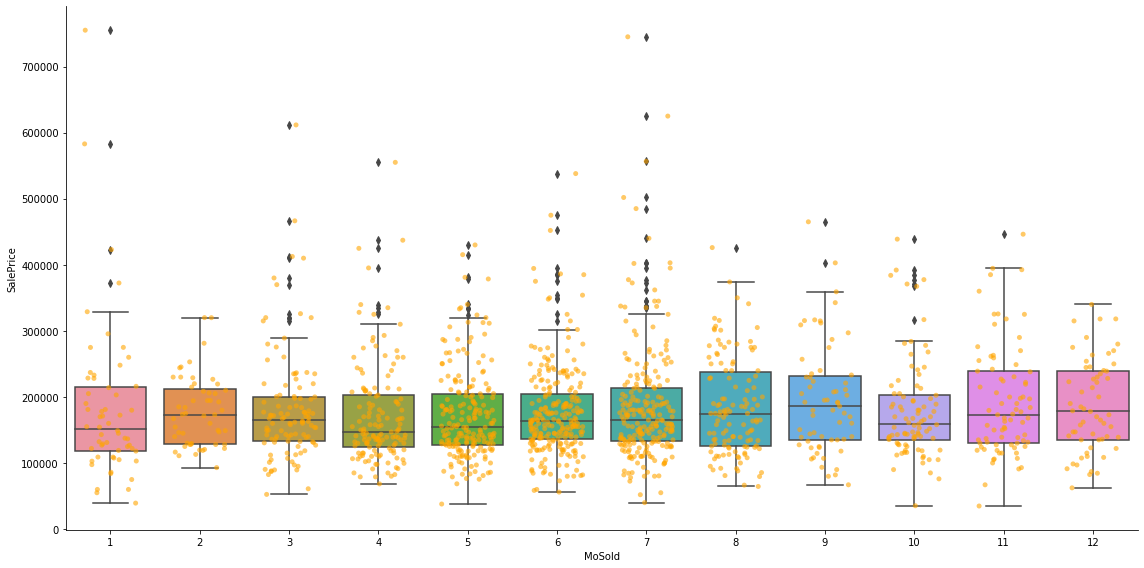

In [165]:
for var in discrete_vars:
    #generating boxplot with Catplot
    sns.catplot(x=var,y='SalePrice',data=data,kind="box",height=8,aspect=2)
    #add data points to boxplot with stripplot
    sns.stripplot(x=var,y='SalePrice',data=data,jitter=0.3,alpha=0.6,color='orange')
    plt.show()

**`Observation:`**

For most discrete numerical variables, an increase in sale price with quality or overall condition or number of rooms or surface

* For some variables, we don't see this tendency
* Most likely that variable is not a good predictor of sale price

### 4.3. Continuous variables

Exploring distribution of continuous variables
* I will consider continuous variables to all those that are not temporal or discrete



In [166]:
#list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [167]:
#visualising continuous variables

data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

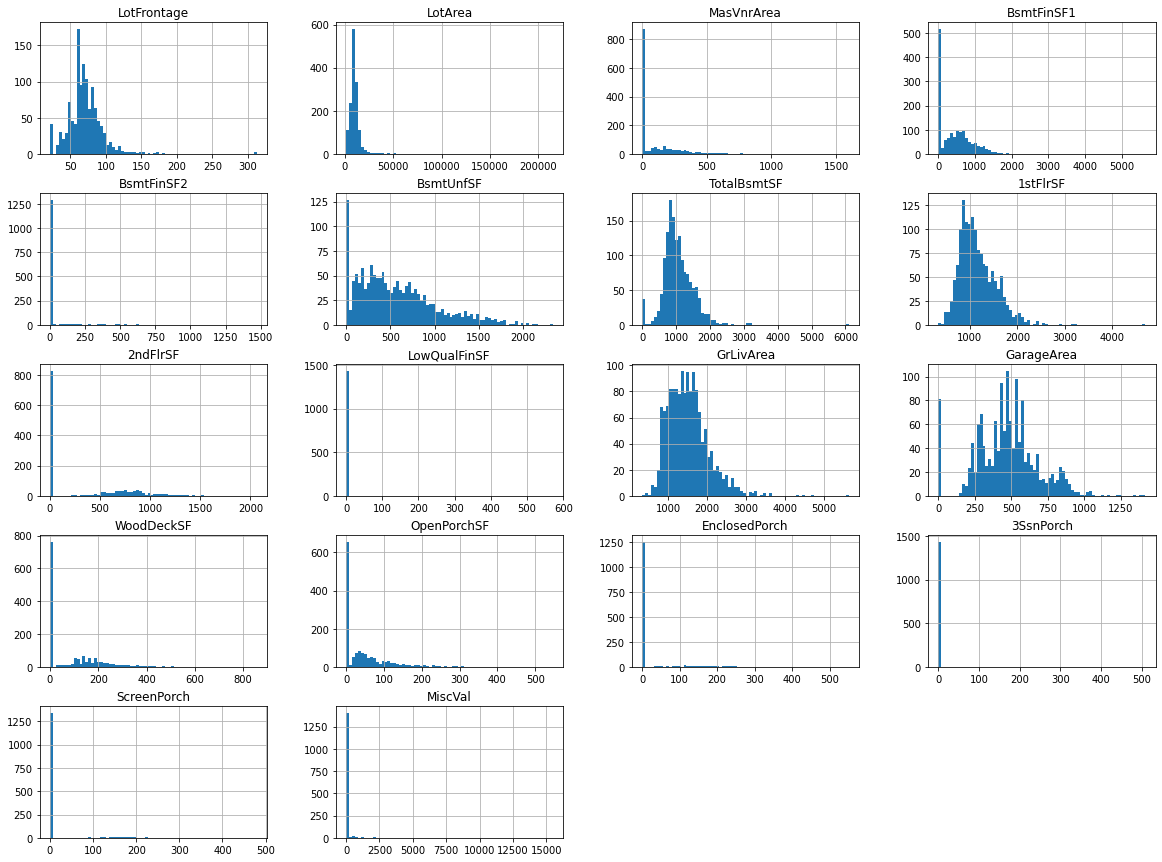

In [168]:
#plotting histograms for all continuous variables

data[cont_vars].hist(bins=70,figsize=(20,15))
plt.show()

**`Observation:`**

* Variables are not normally distributed
    * Some are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal

Sometimes transforming variables to improve value spread, improves model performance. But it is unlikely that a transformation will help change distribution of super skewed variables dramatically

Let's apply `Yeo-Johnson transformation` to variables like 
* `LotFrontage, LotArea, BsmUnfSF` and

`Binary transformation` to variables like 
* `3SsnPorch, ScreenPorch and MiscVal`

In [169]:
#list of super skewed variables

skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'MiscVal']

#list of remaining continuous variables

cont_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
             '1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']

### Yeo-Johnson Transformation

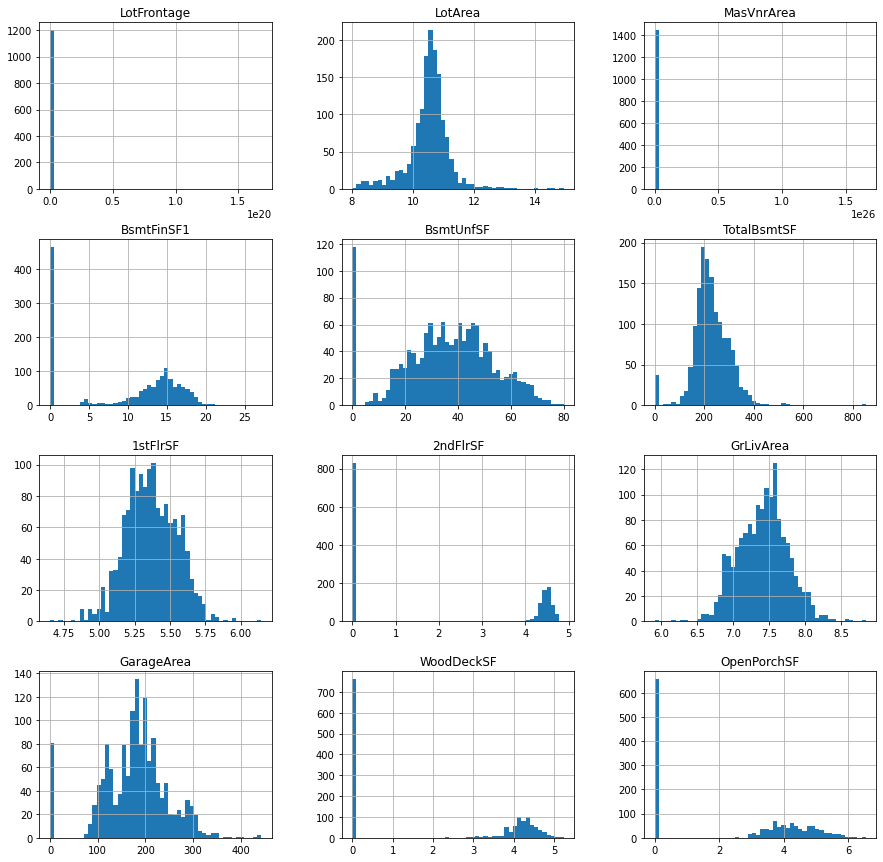

In [170]:
tmp = data.copy()

for var in cont_vars:

    #transforming variable using : yeo-johsnon
    tmp[var],param = stats.yeojohnson(data[var])

  
#plotting histograms of transformed variables
tmp[cont_vars].hist(bins=50, figsize=(15,15))
plt.show()

**`Observation:`**

* For LotFrontage and MasVnrArea transformation did not work great

* Other values seem to be spread more evenly in range

This tranformation will help in improving predictive power, will seen
* To determine if this is the case, I will maybe train a model with original values and one with transformed values, and determine model performance, and feature importance. But for now I am forgetting it.

Let's perform a quick visual exploration:

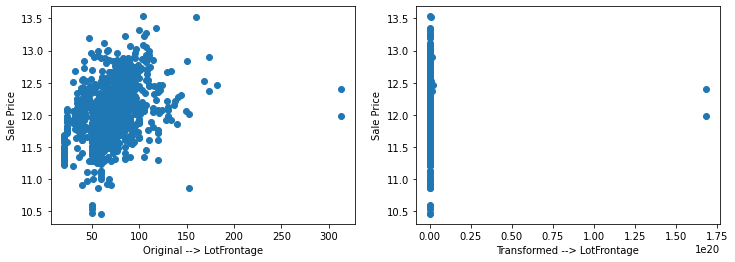

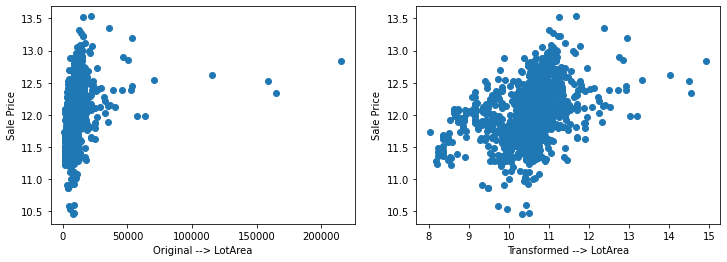

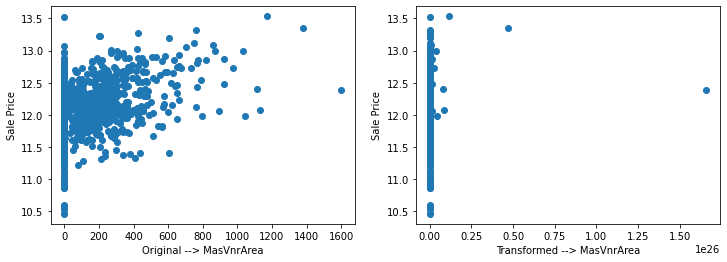

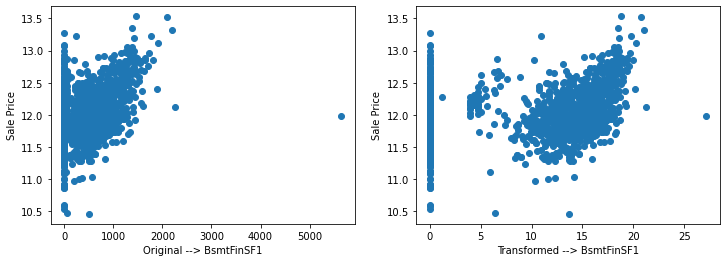

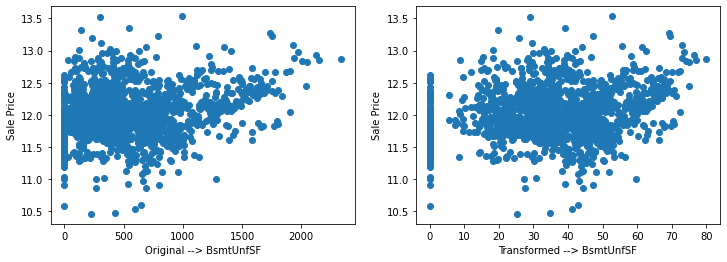

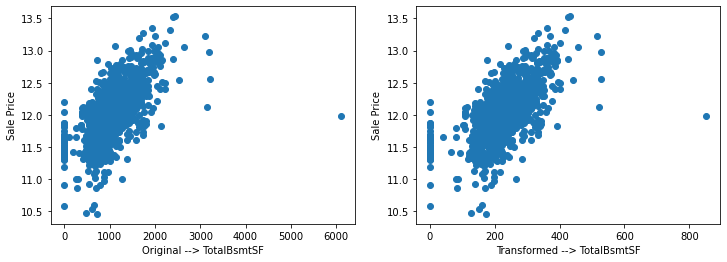

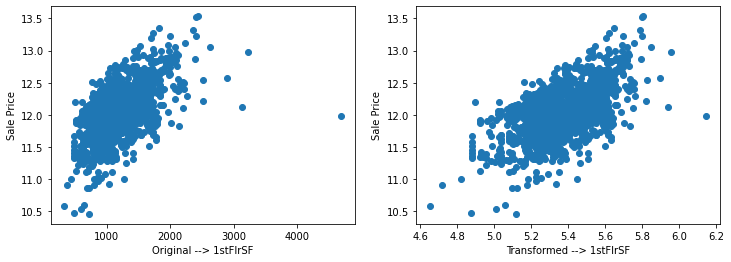

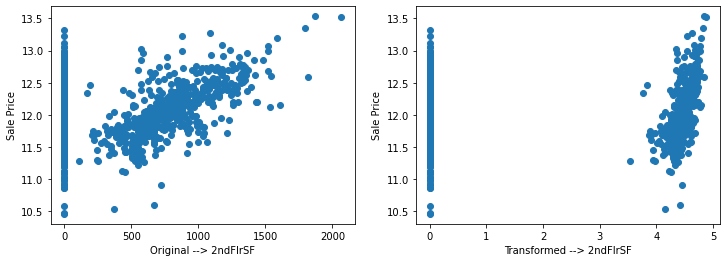

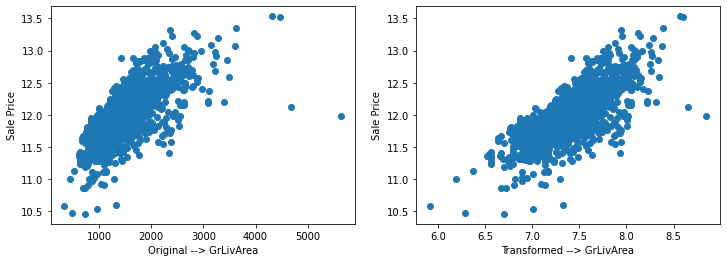

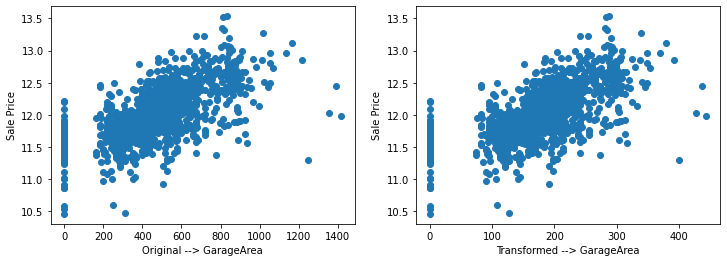

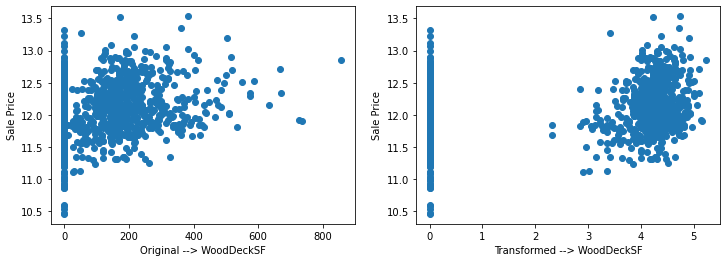

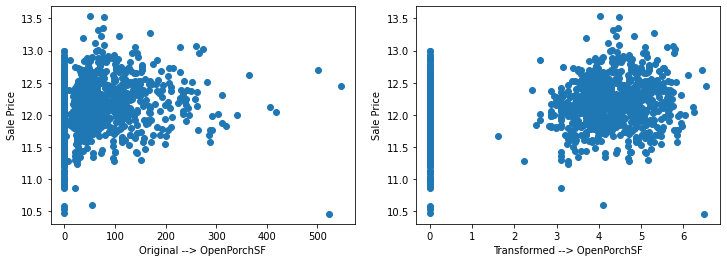

In [174]:
#plotting original or transformed variables vs sale price, aim is to see if there is a relationship

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    #plotting original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original --> ' + var)

    #plotting transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed --> ' + var)
                
    plt.show()

**`Observation:`**

* Plots visualas states that transformations seems to improve relationship only for `LotArea`

Let's try a different transformation now
* Most variables contain value as 0 ,so
    * we can't apply `logarithmic transformation`, but 
    * we can certainly do that for following variables:
        * `LotFrontage`
        * `1stFlrSF`
        * `GrLivArea`

Let's perform log transformation and see if that changes variables distribution and its relationship with target

### Logarithmic transformation

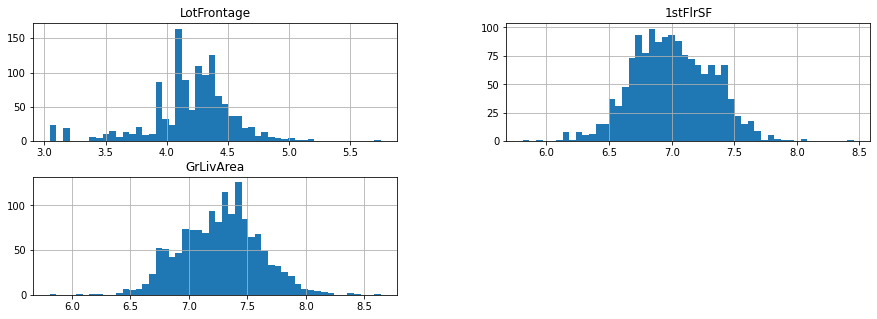

In [180]:
#analysing distribution of above mentioned variables after applying log tranformation
tmp = data.copy()

for feature in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    #log transformation
    tmp[feature] = np.log(data[feature])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=50,figsize=(15,5))
plt.show()

**`Observation:`**
Distribution of variables are now more alike "Gaussian"

Let's evaluate their relationship with target

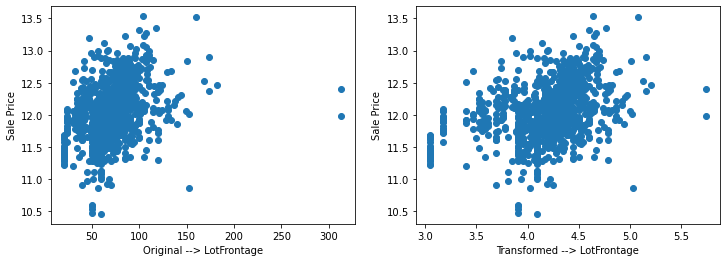

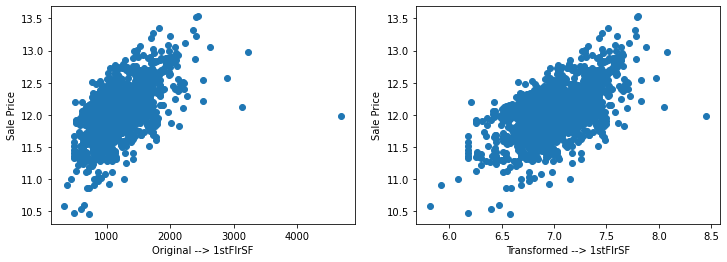

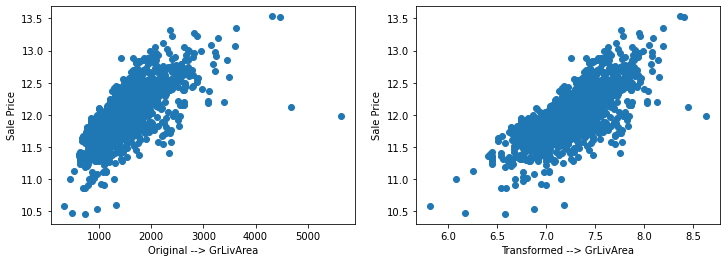

In [181]:
#plotting original or transformed variables vs sale price, aim is to see if there is a relationship
for var in ["LotFrontage","1stFlrSF","GrLivArea"]:
    
    plt.figure(figsize=(12,4)) 
    #plotting original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original --> ' + var)

    #plotting transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed --> ' + var)
                
    plt.show()

**`Observation:`**
Transformed variables have a better spread of values, which may in turn, help make better predictions

### `Skewed variables`
Let's transform them into binary variables and see how predictive they are:

In [183]:
print(skewed)

['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


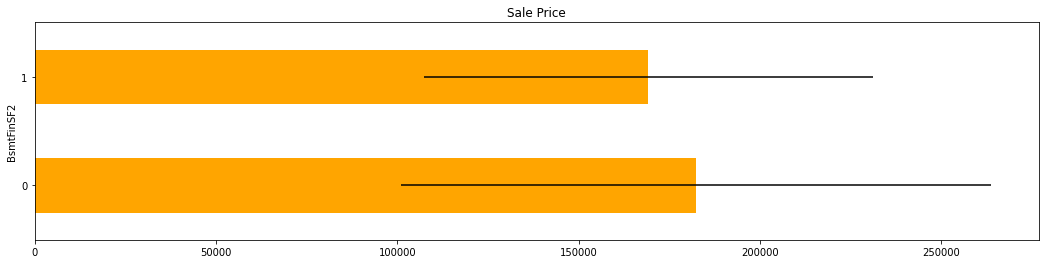

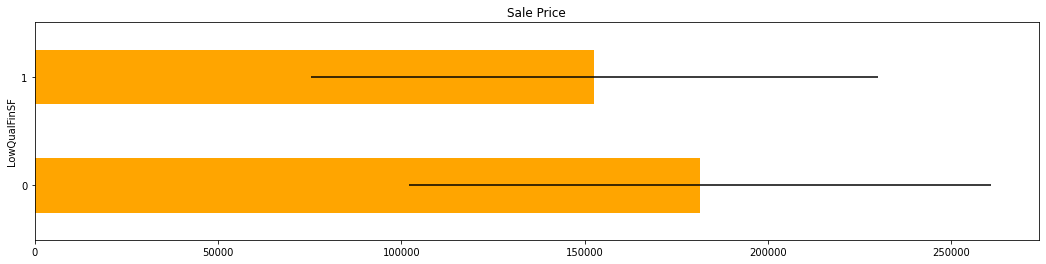

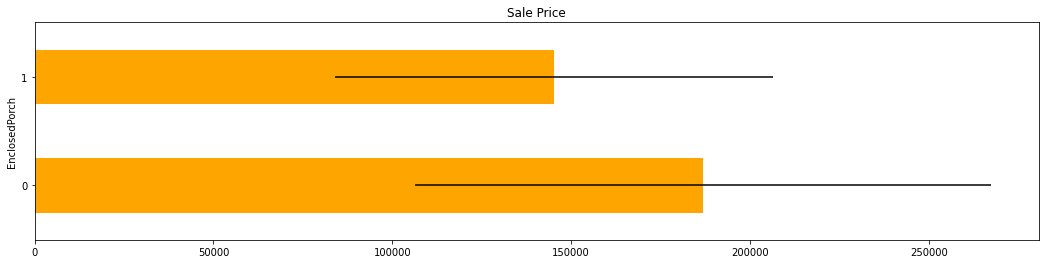

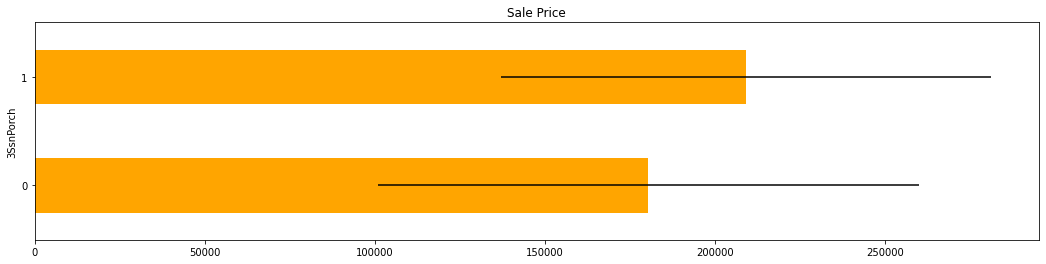

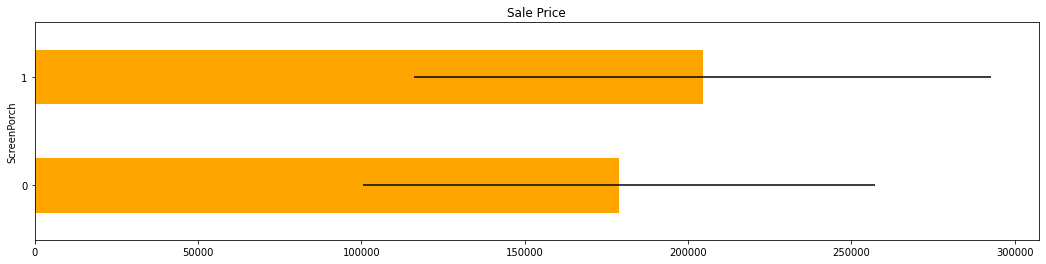

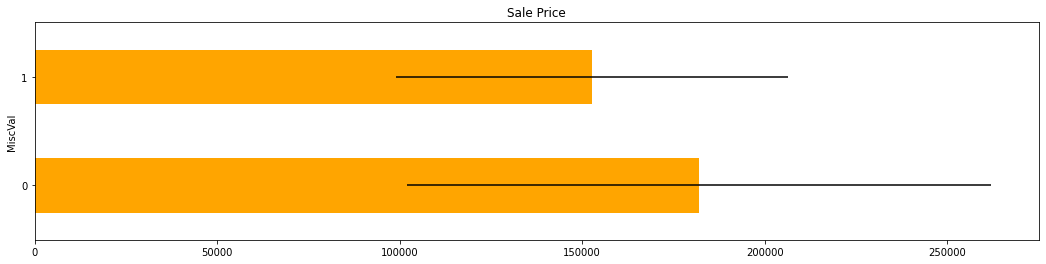

In [188]:
for var in skewed:
    
    tmp = data.copy()
    #mapping variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    #determine mean sale price in mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,xerr="std", 
             title="Sale Price", color='orange',figsize=(18,4))

    plt.show()

`Observation:`
There seem to be a difference in Sale Price in mapped values, but confidence intervals overlap, so most likely this is not significant or predictive


### 5. Categorical variables

* `Cardinality`
* `Rare Labels`
* `Special mappings`

In [191]:
print('Number of categorical variables: ', len(cat_vars),'\n')

#values in categorical variables
data[cat_vars].tail(10)

Number of categorical variables:  44 



MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1450       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1451       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1452       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1453       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1454       FV   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
1450        NAmes       Norm       Norm   Duplex     2Story     Gable   
1451      Somerst       Norm       Norm     1Fam     1Story     Gable   
1452      Edwards       Norm       Norm   TwnhsE       SLvl     Gable   
1453      Mitchel       Norm       Norm     1Fam     1Story     Gable   
1454      Somerst       Norm       Norm     1Fam     1Story     Gable   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1450  CompShg     VinylSd     VinylSd       None        TA        TA   
1451  CompShg     CemntBd     CmentBd      Stone        Gd        TA   
1452  CompShg     VinylSd     VinylSd    BrkFace        TA        TA   
1453  CompShg     VinylSd     VinylSd       None        TA        TA   
1454  CompShg     VinylSd     VinylSd       None        Gd        TA   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
1450     CBlock       Gd       TA           No          Unf          Unf   
1451      PConc       Gd       TA           No          Unf          Unf   
1452      PConc       Gd       TA           Gd          GLQ          Unf   
1453      PConc       Gd       TA           No          Unf          Unf   
1454      PConc       Gd       TA           No          GLQ          Unf   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
1450    GasA        TA          Y      SBrkr          TA        Typ   
1451    GasA        Ex          Y      SBrkr          Ex        Typ   
1452    GasA        Gd          Y      SBrkr          TA        Typ   
1453    GasA        Ex          Y      SBrkr          TA        Typ   
1454    GasA        Ex          Y      SBrkr          Gd        Typ   
1455    GasA        Ex          Y      SBrkr          TA        Typ   
1456    GasA        TA          Y      SBrkr          TA       Min1   
1457    GasA        Ex          Y      SBrkr          Gd        Typ   
1458    GasA        Gd          Y      F

### 5.1. Cardinality (number of labels)

Let's see how many different categories are present in each of cat  variables

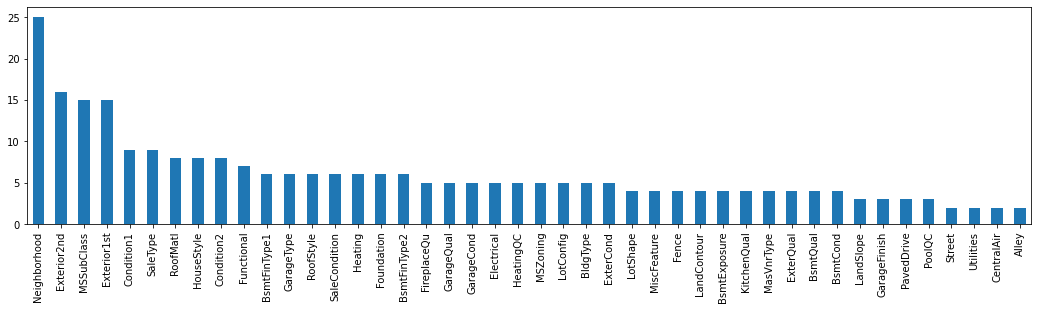

In [196]:
#counting unique categories with pandas unique() and plotting them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(18,4))
plt.show()

**`Observation:`**

Categorical variables are show low cardinality, this means that they have only few different labels
* That is good as we won't need to tackle cardinality in feature engineering

### 5.1.2. Quality variables
Variables which help in understanding quality of house
* Example:  garage or fence or kitchen

I will replace these categories by numbers increasing with quality of place or room

Example:

* Ex = Excellent
* Gd = Good
* TA = Average/Typical
* Fa = Fair
* Po = Poor

In [197]:
#re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,
                 'Ex': 5, 'Missing': 0, 'NA': 0
                }

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 
             'KitchenQual', 'FireplaceQu','GarageQual', 'GarageCond'
            ]

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [198]:
var = 'BsmtExposure'
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4,
                     'Missing': 0, 'NA': 0
                    }
data[var] = data[var].map(exposure_mappings)

In [199]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 
                   'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6
                  }

finish_vars = ['BsmtFinType1','BsmtFinType2'
              ]

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [200]:
var = 'GarageFinish'
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1,
                   'RFn': 2, 'Fin': 3
                  }
data[var] = data[var].map(garage_mappings)

In [201]:
var = 'Fence'
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 
                  'GdWo': 2,'MnPrv': 3, 'GdPrv': 4
                 }
data[var] = data[var].map(fence_mappings)

In [203]:
#taking all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']
print(qual_vars)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'GarageFinish', 'Fence', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'GarageFinish', 'Fence']


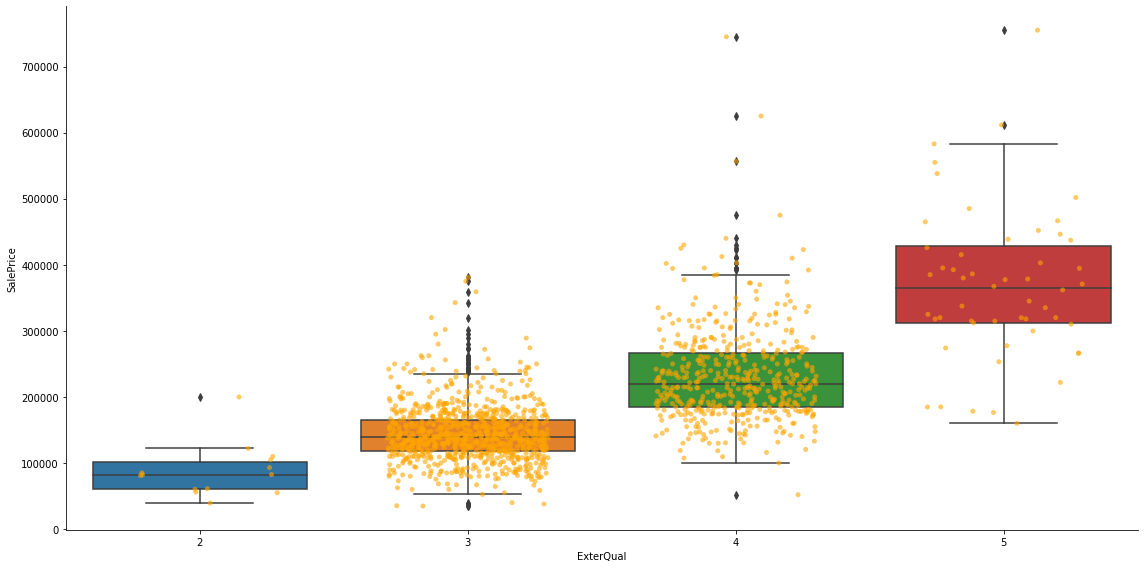

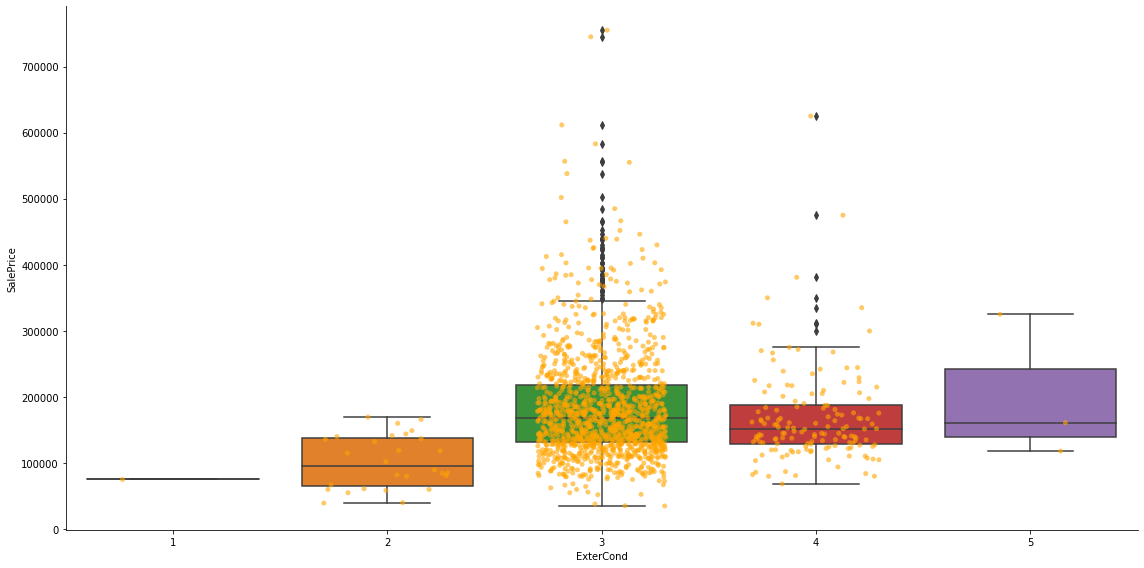

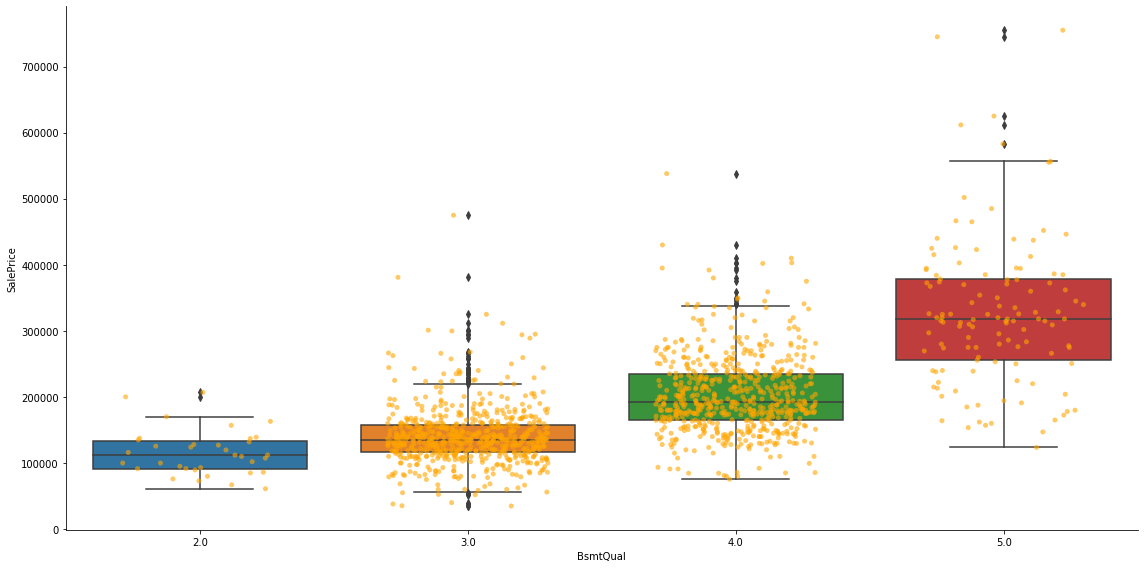

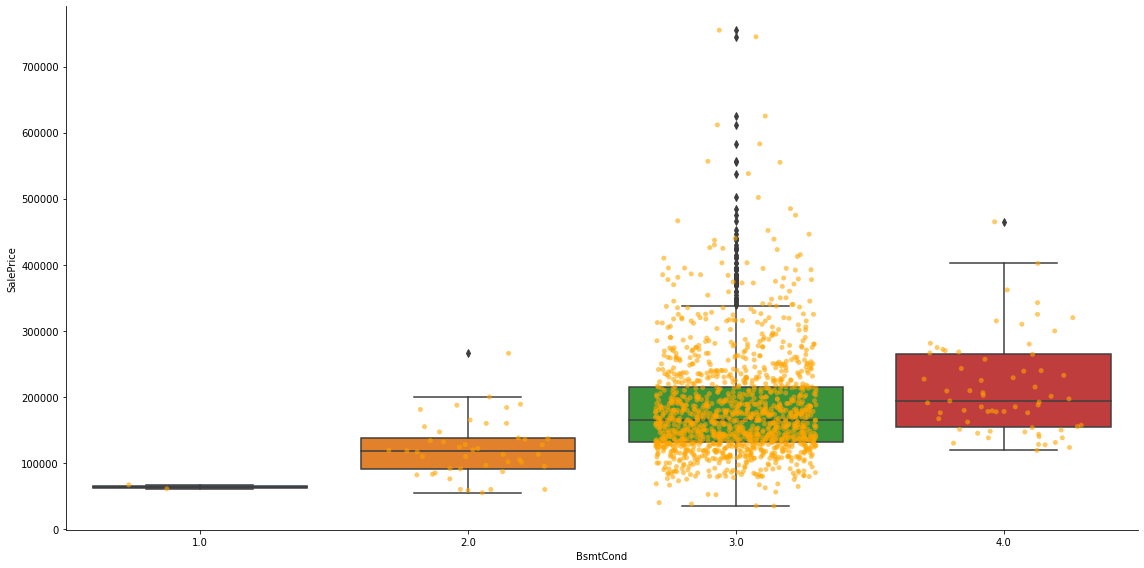

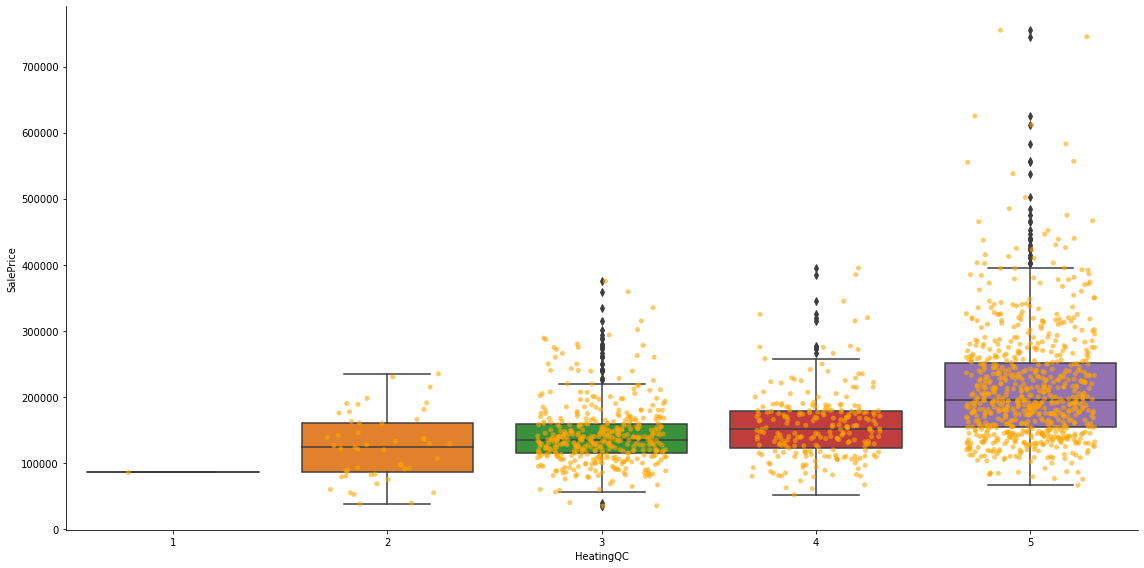

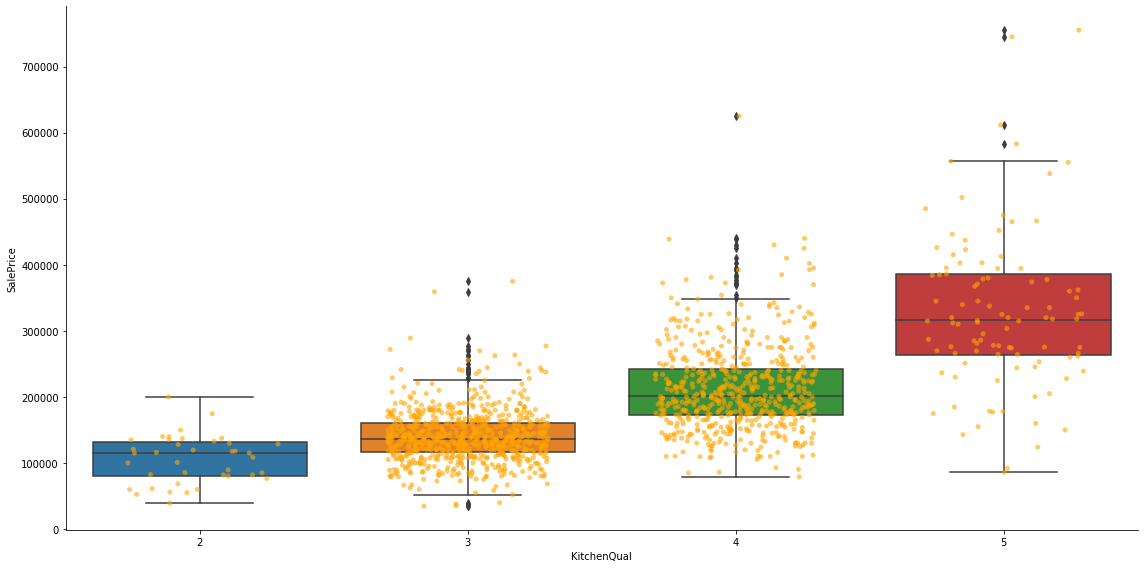

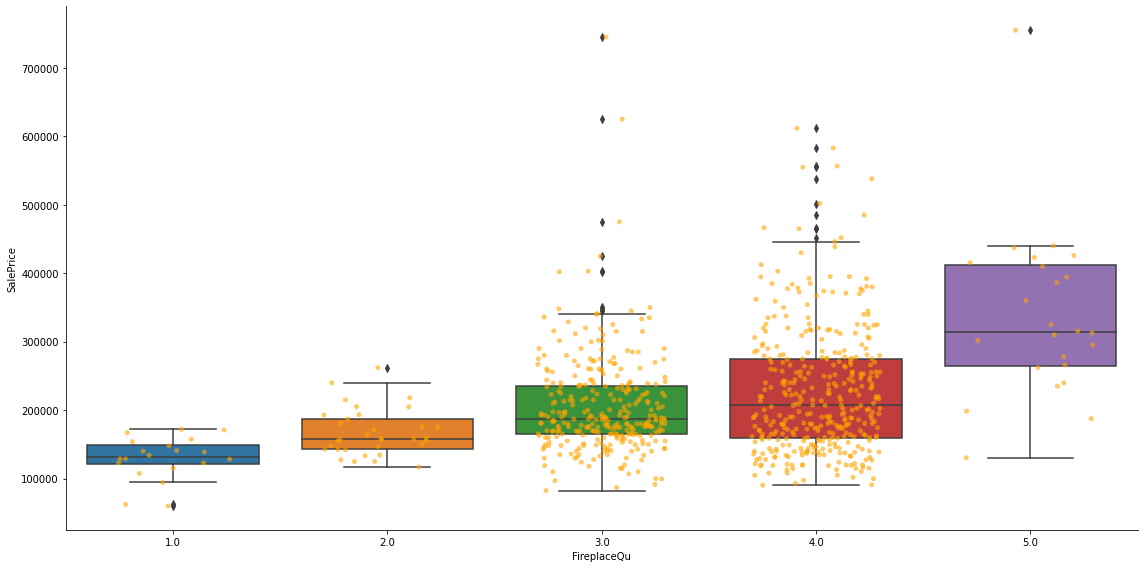

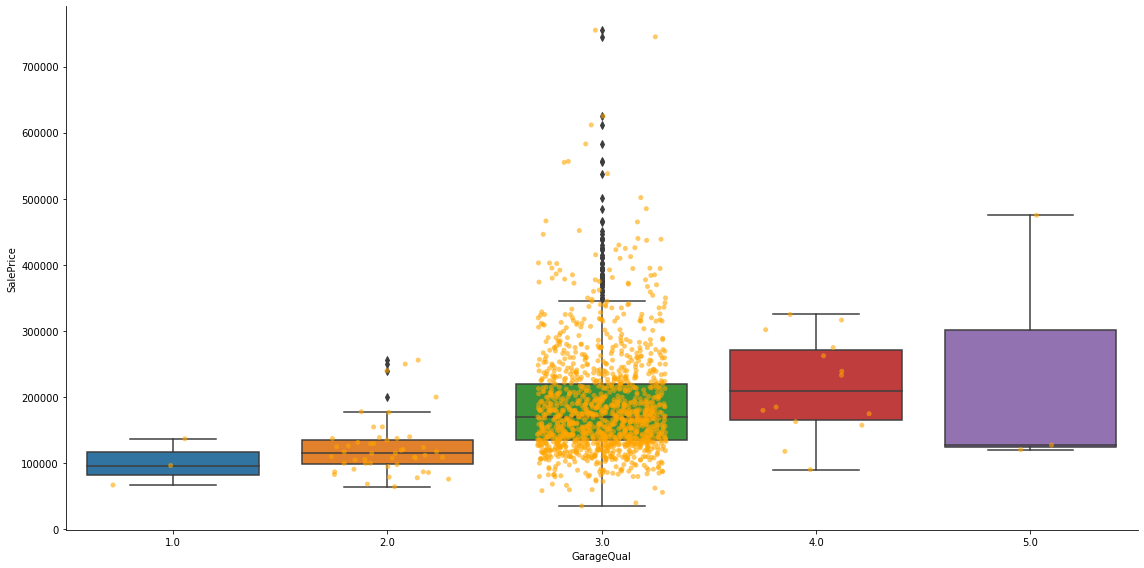

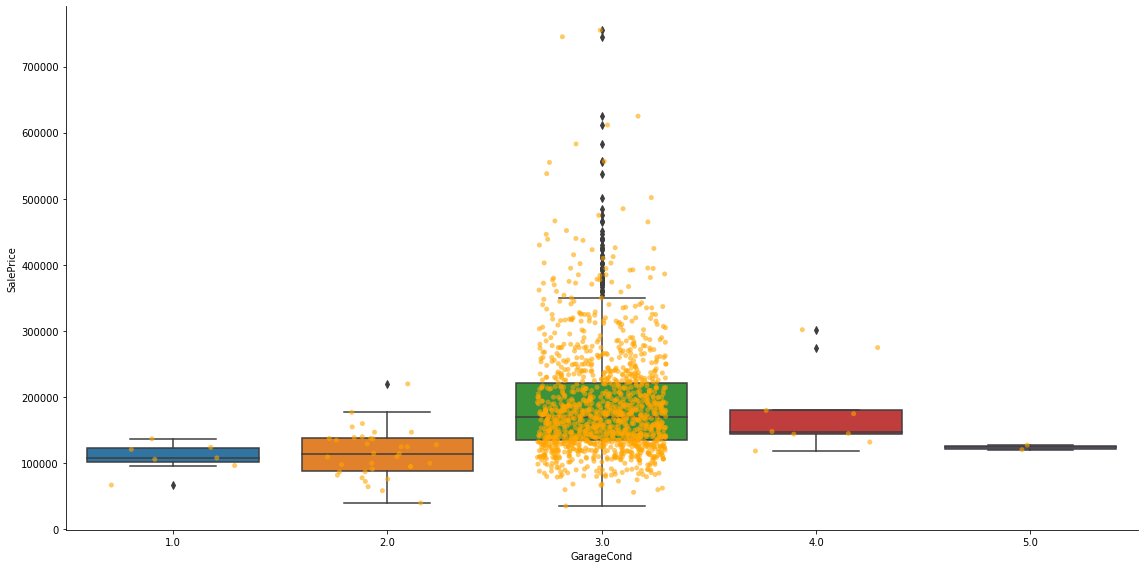

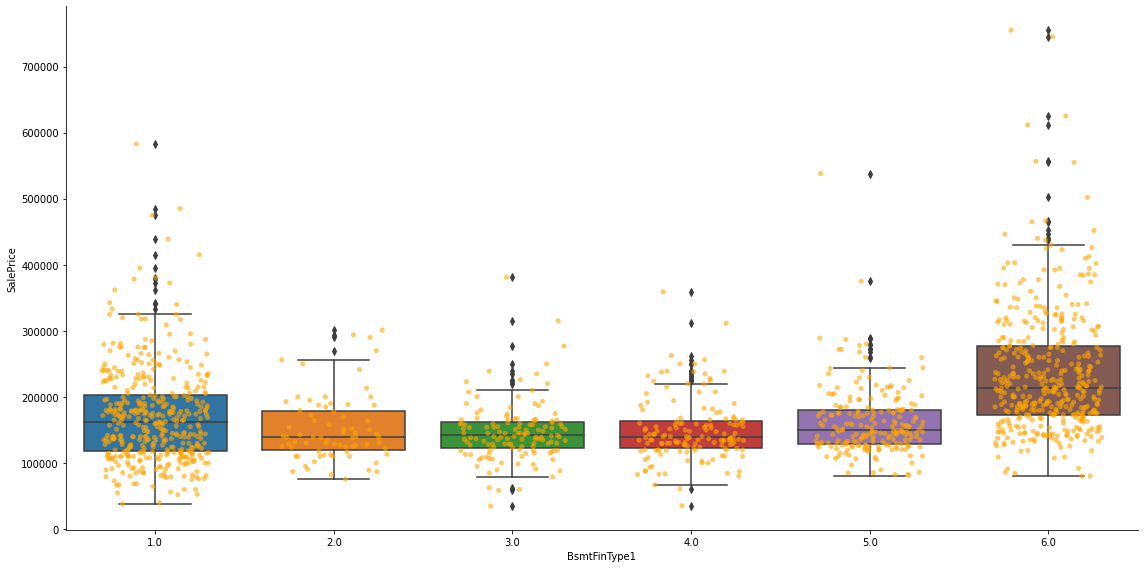

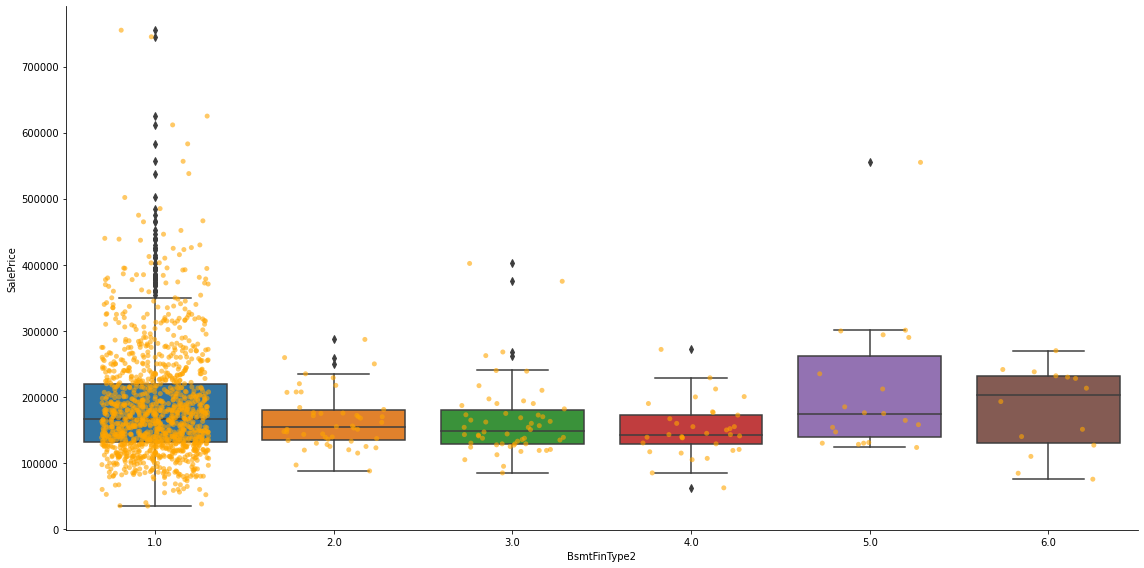

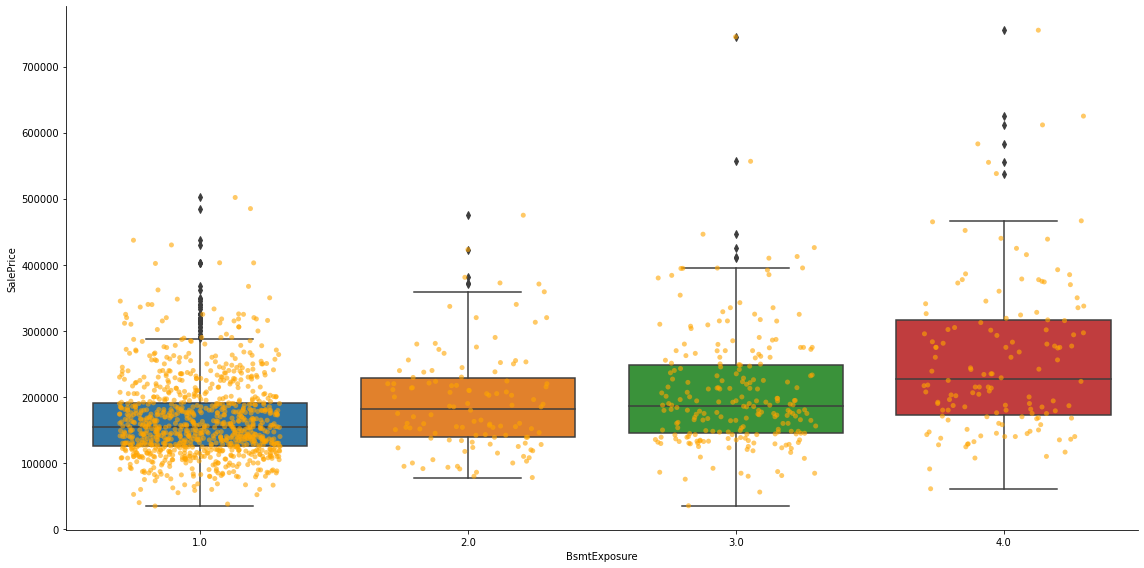

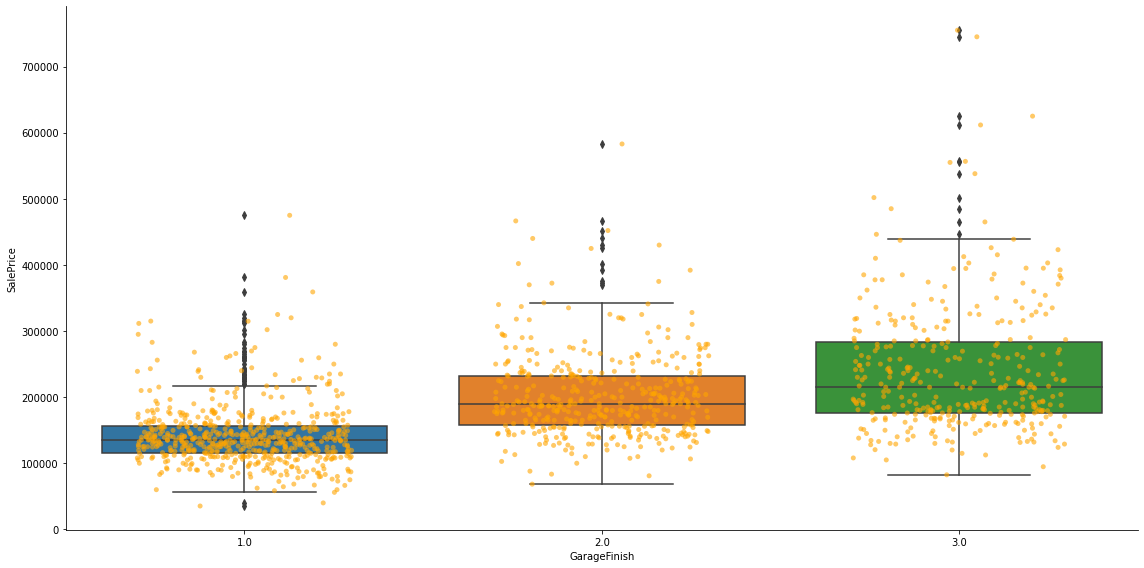

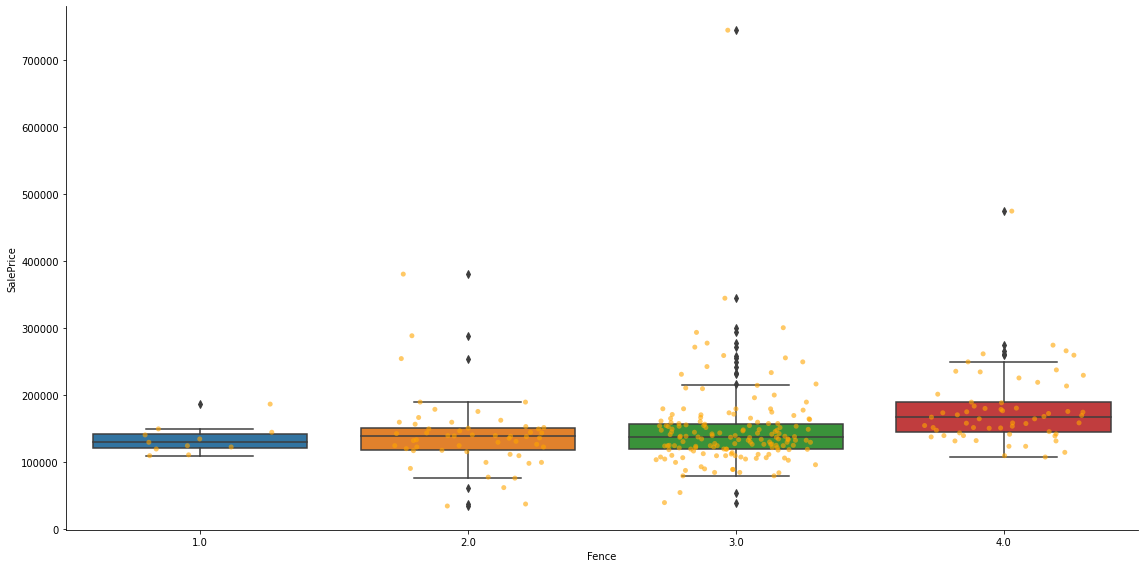

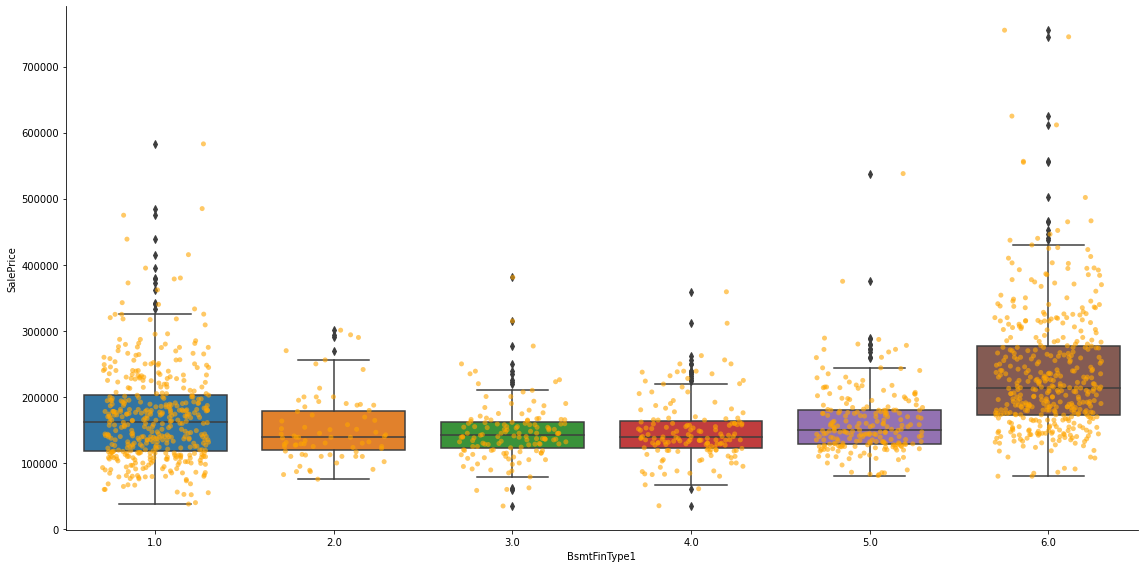

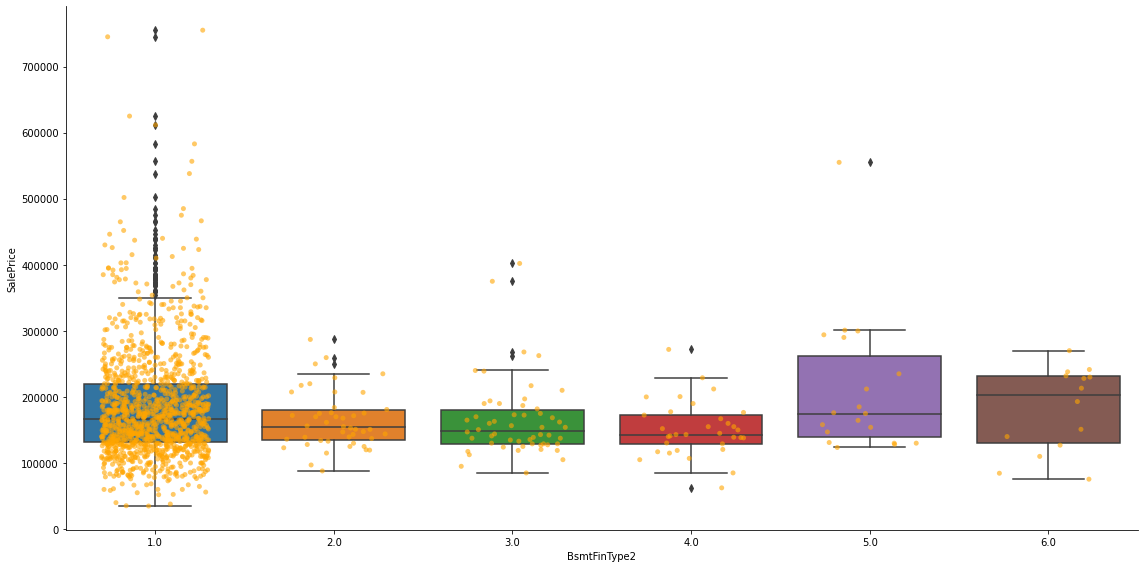

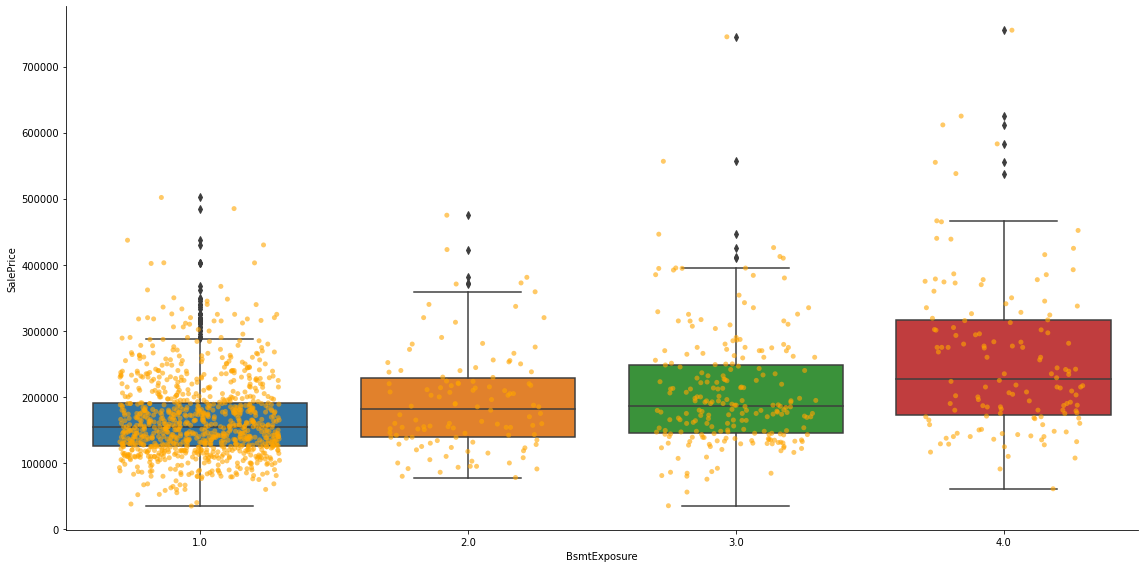

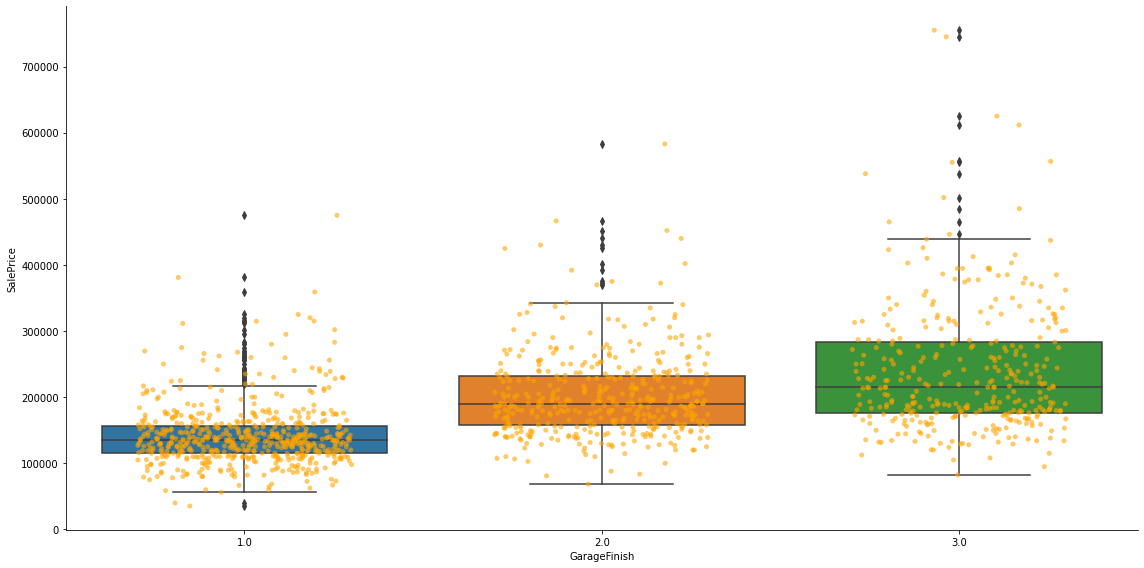

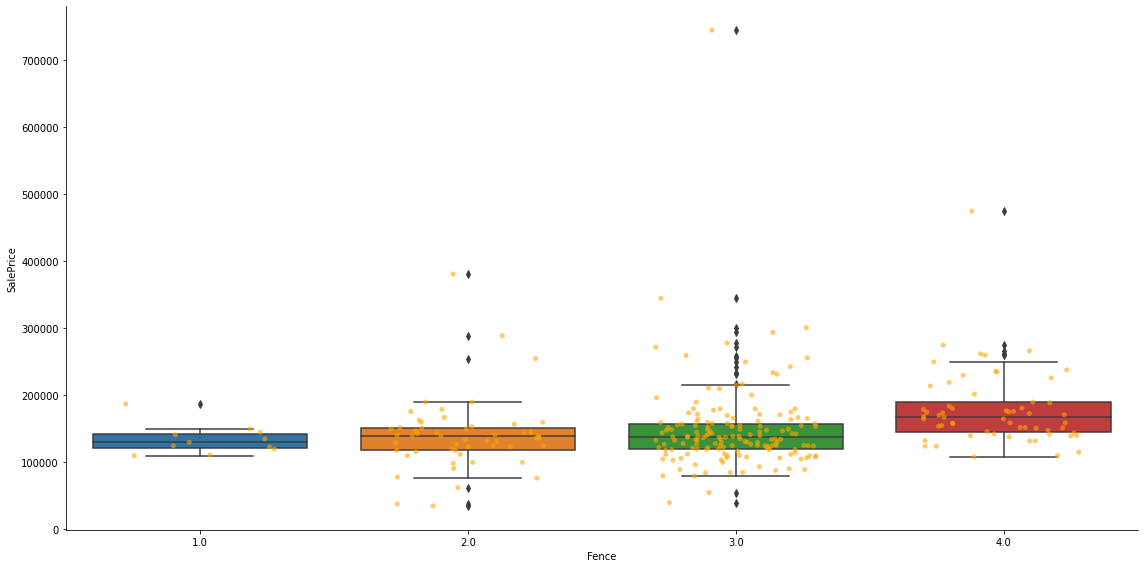

In [206]:
#plotting house mean sale price based on quality of various attributes

for var in qual_vars:
    #boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=8, aspect=2)
    #adding data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.3, alpha=0.6, color='orange')
    plt.show()

**`observation:`**
For most Features increase in house price with value of variable, is quite clear

In [207]:
# capture the remaining categorical variables (not re-mapped)

cat_others = [var for var in cat_vars if var not in qual_vars]

len(cat_others)

30

### 5.2. Rare Labels
Let's see if there are labels that are present only in a small number of house

In [208]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    #determining % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    #returning categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than 1 % of observations
for var in cat_others:
    print(analyse_rare_labels(data,var,0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

**`Observation:`**
* Some of categorical variables are showing multiple labels that are present in less than 1% of houses

* Labels that are under-represented in dataset will be a major cause of over-fitting for machine learning model
    * We have to remove under-represented labels

Finally, we want to `explore relationship between categories of different variables and house sale price`

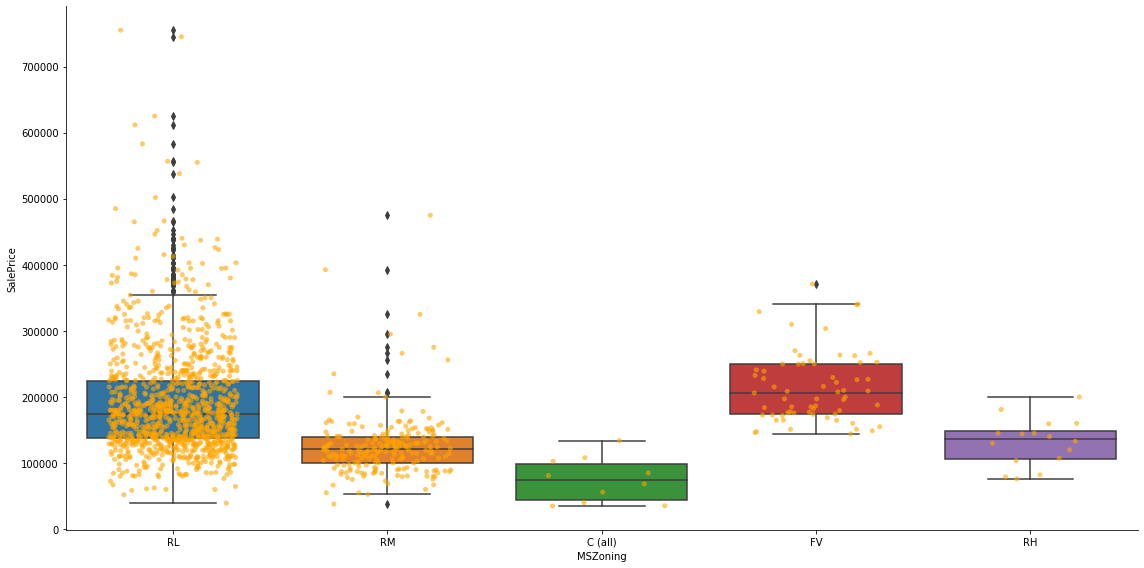

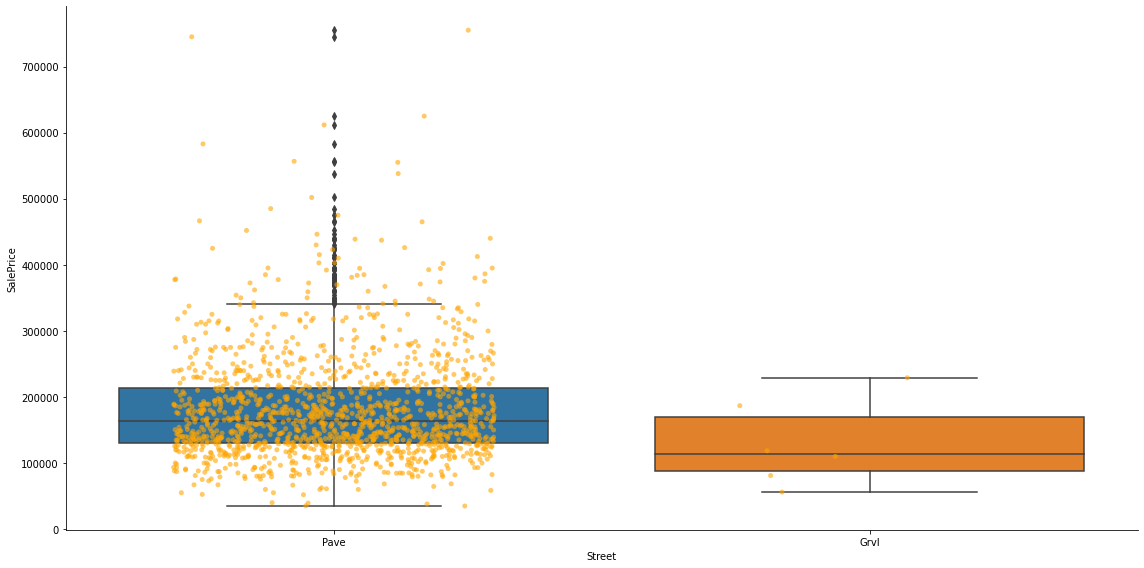

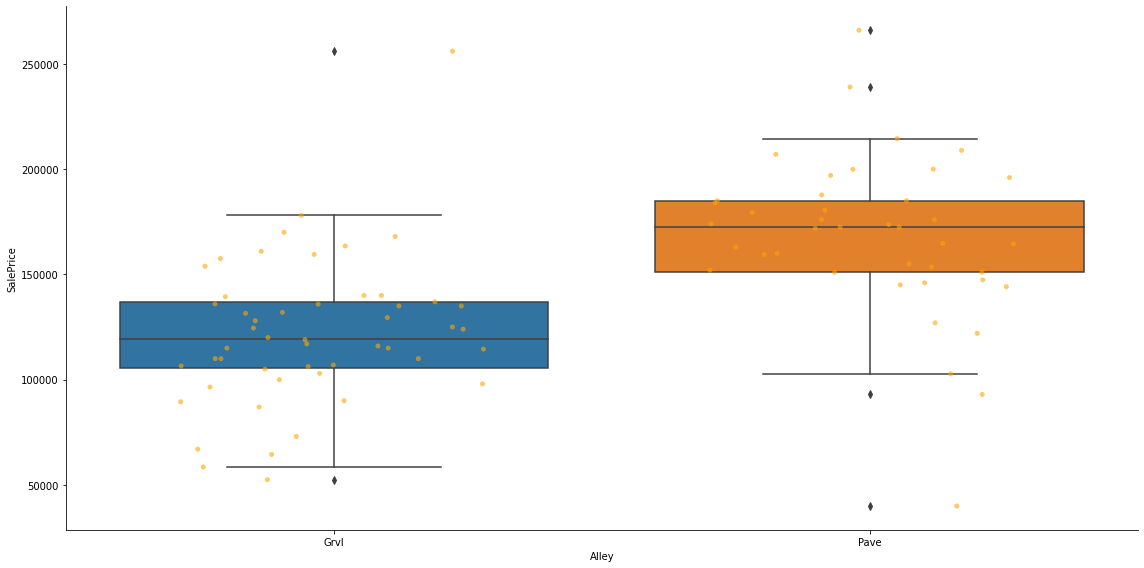

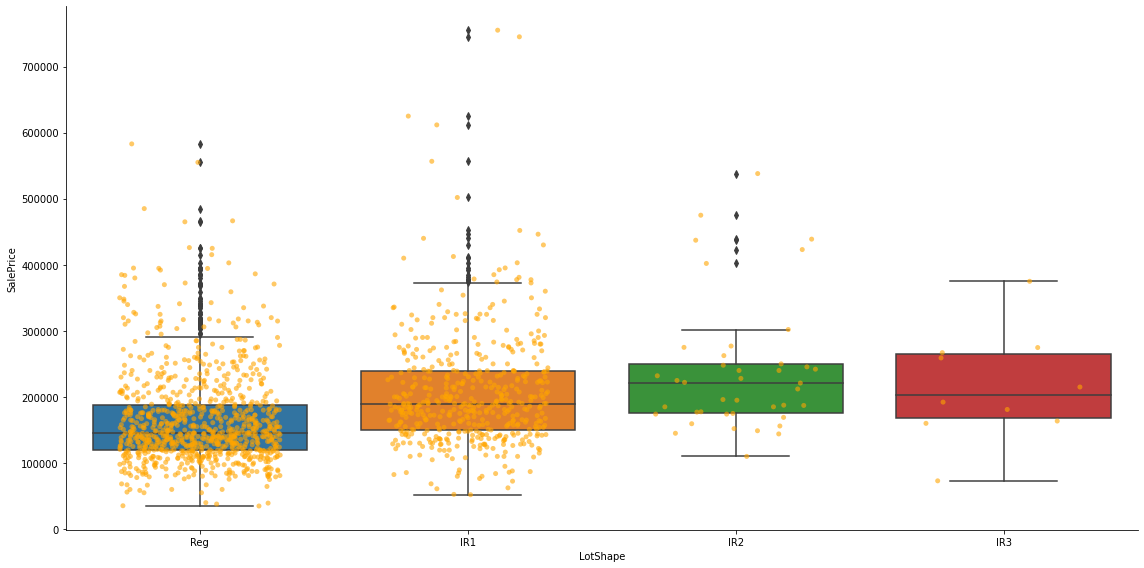

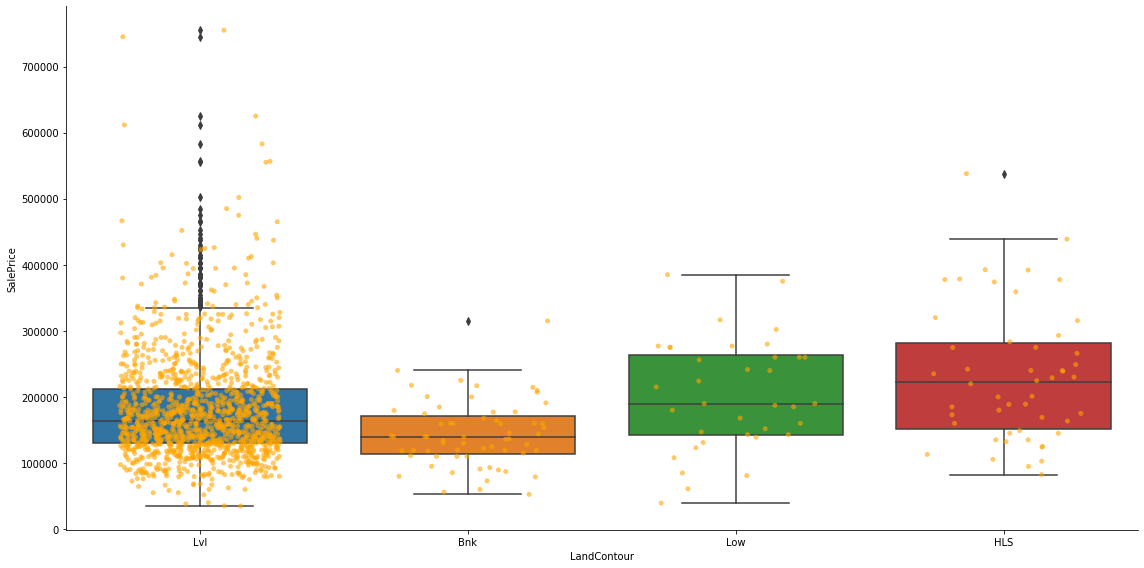

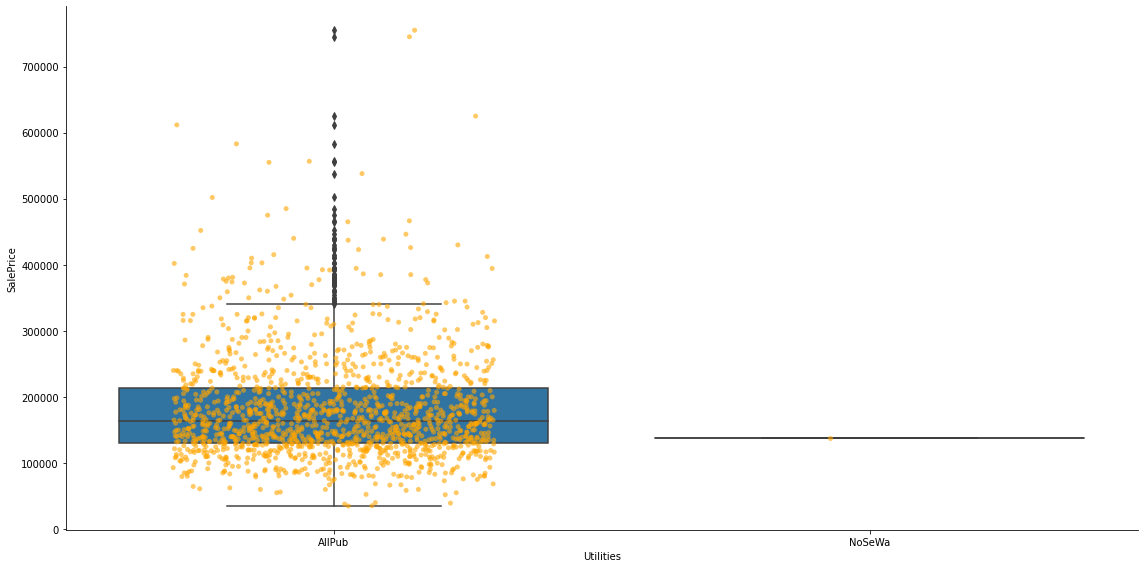

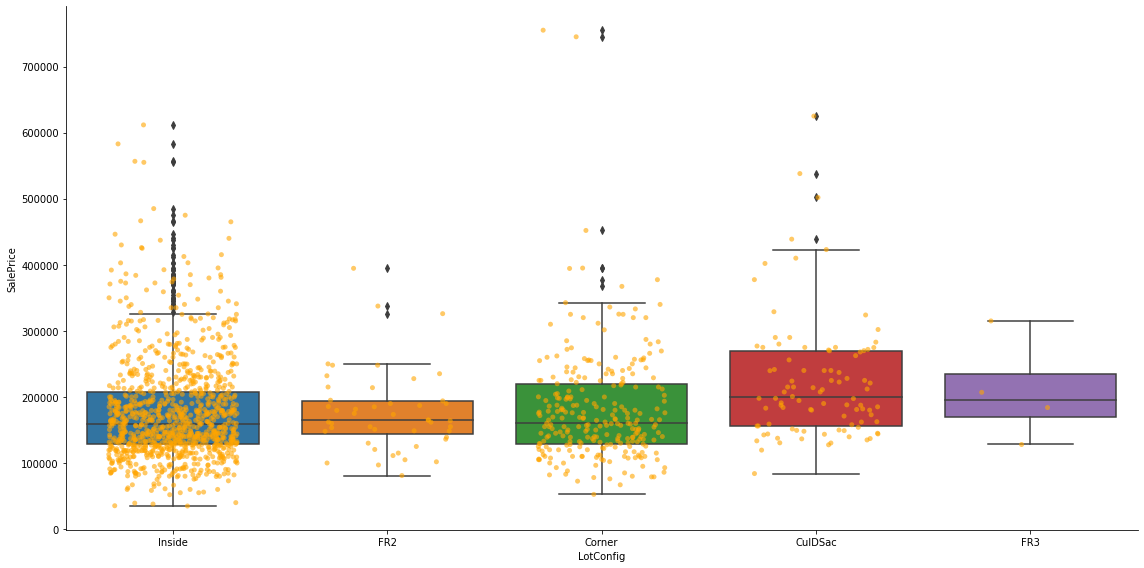

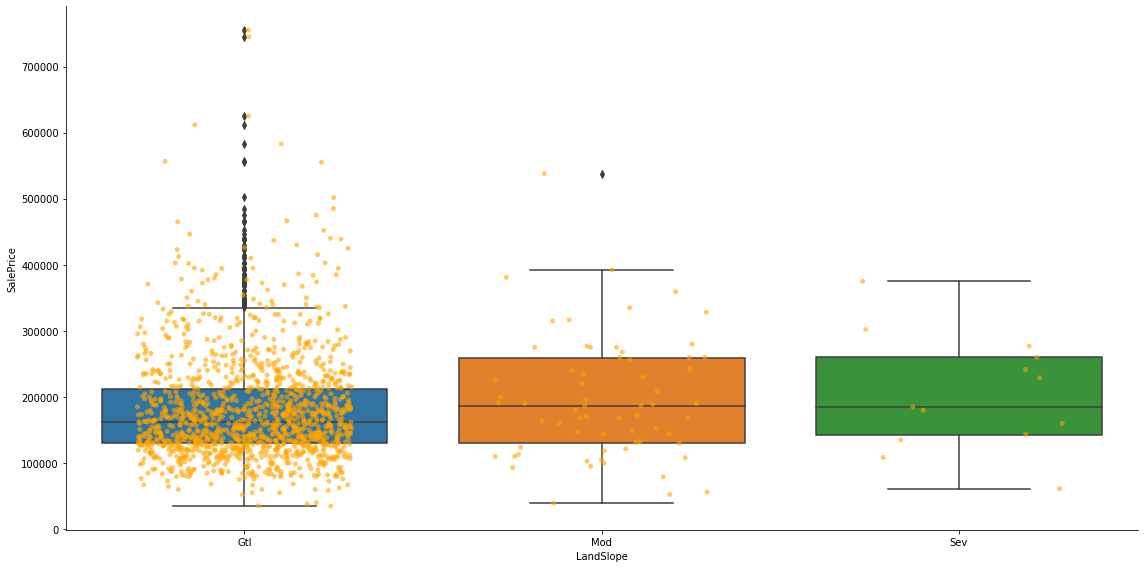

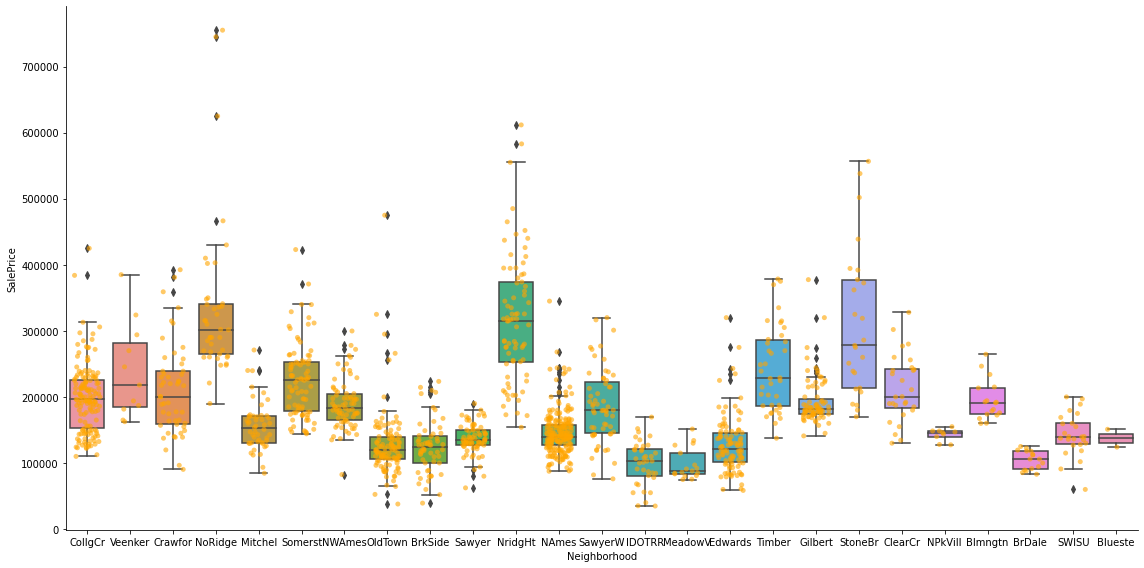

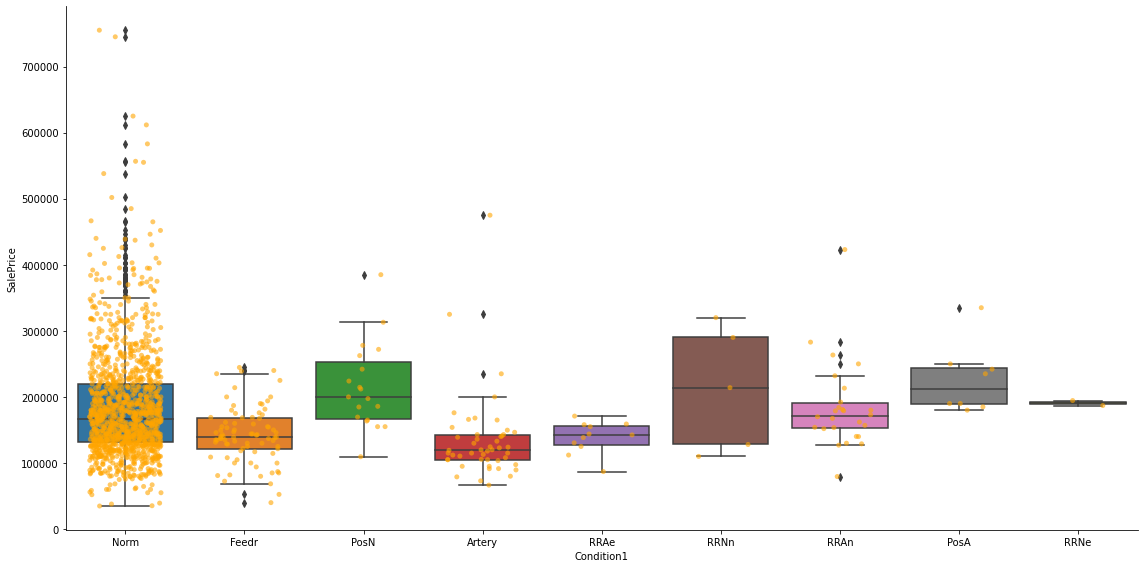

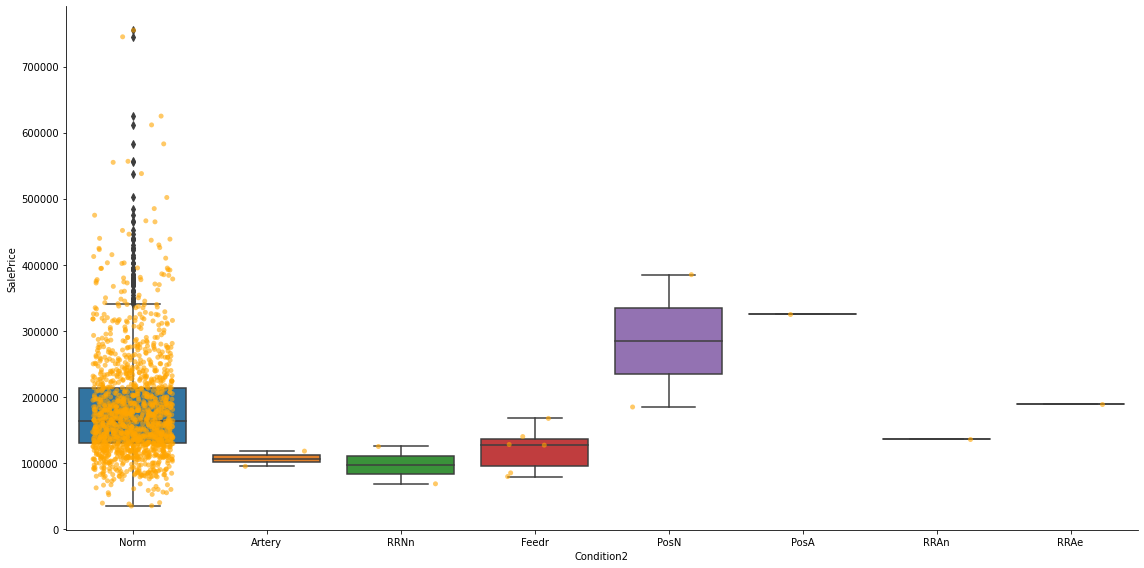

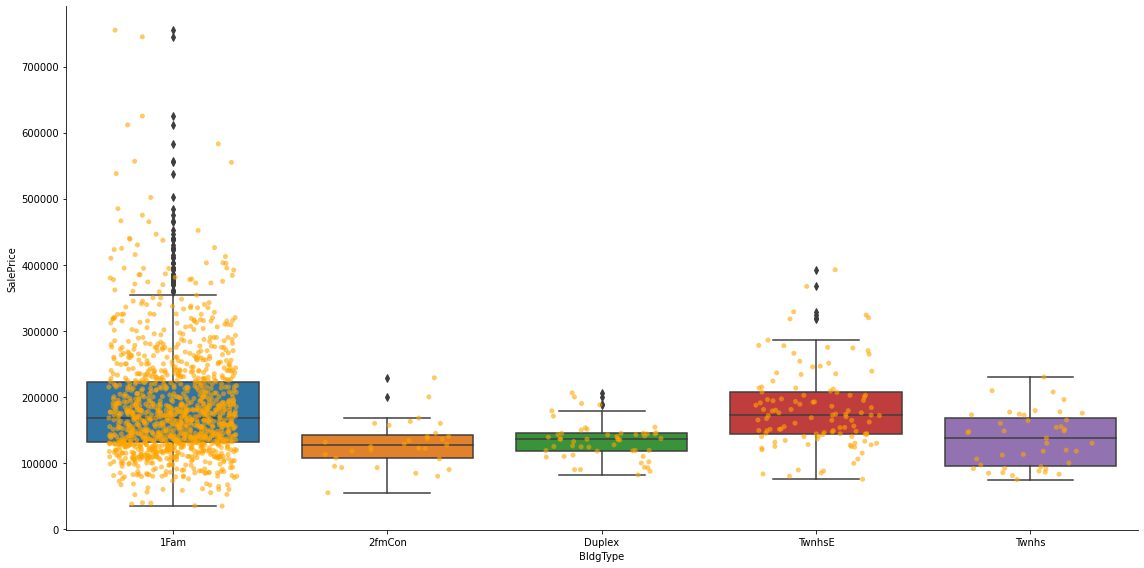

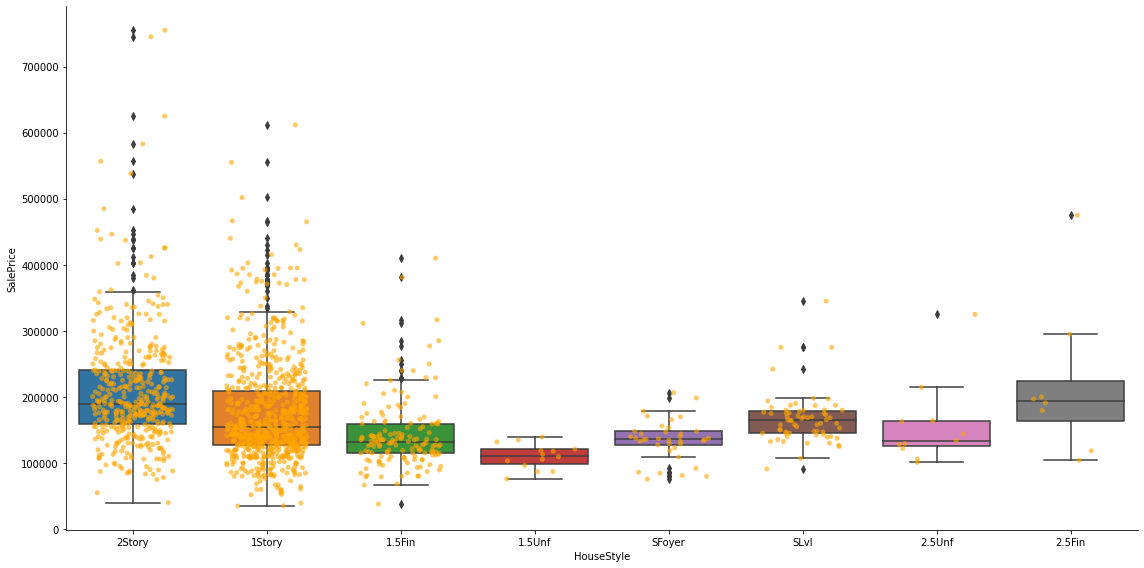

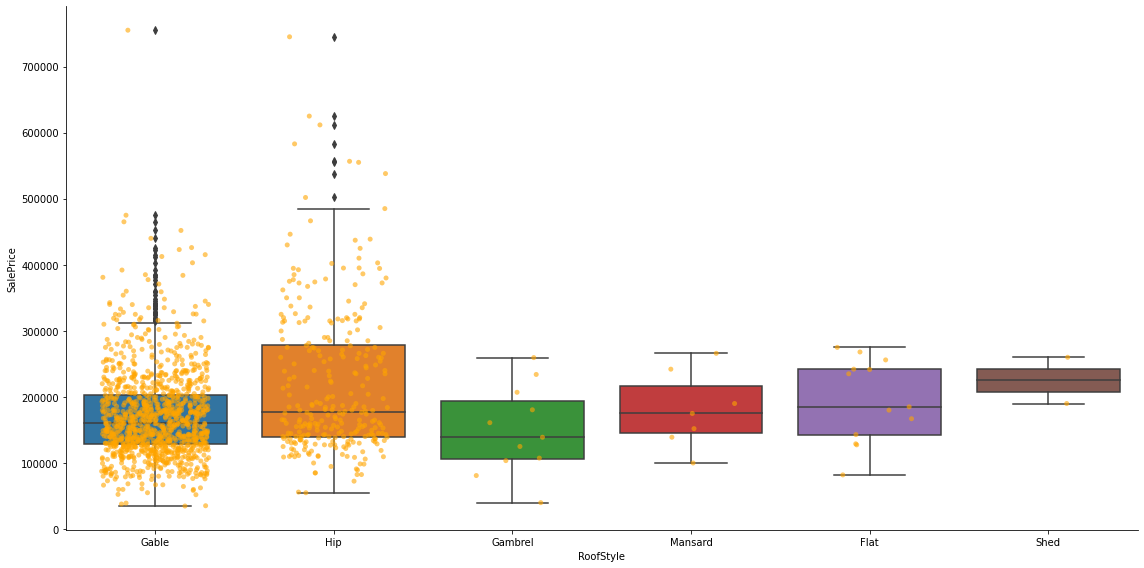

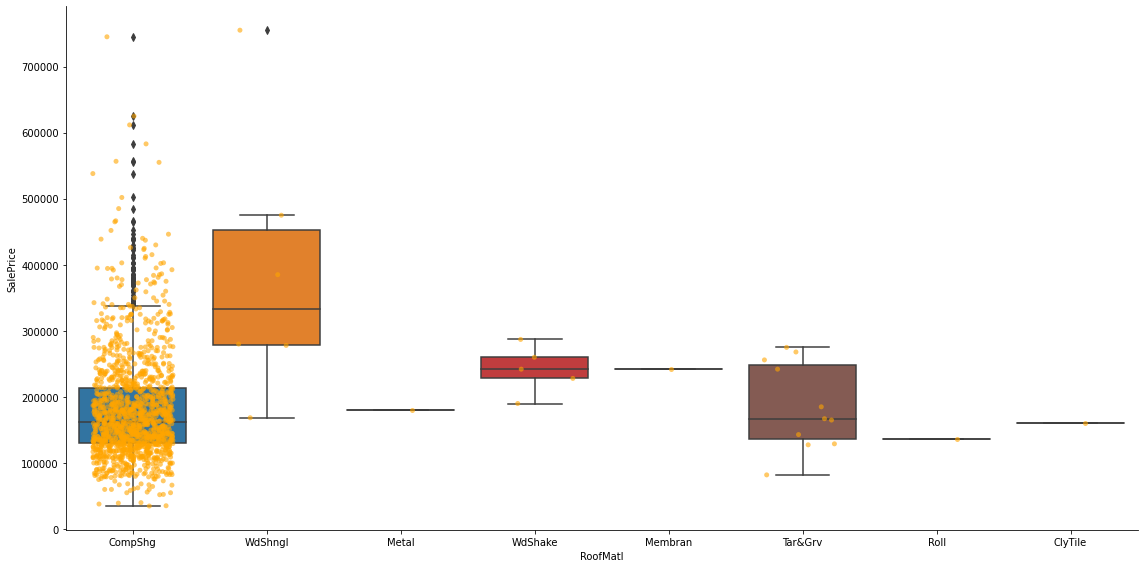

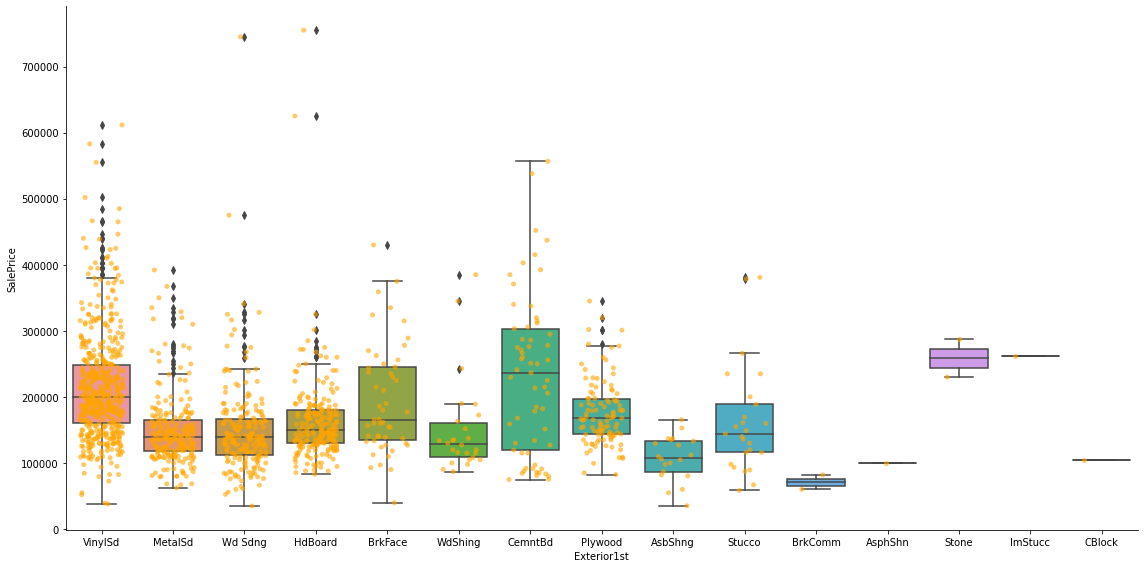

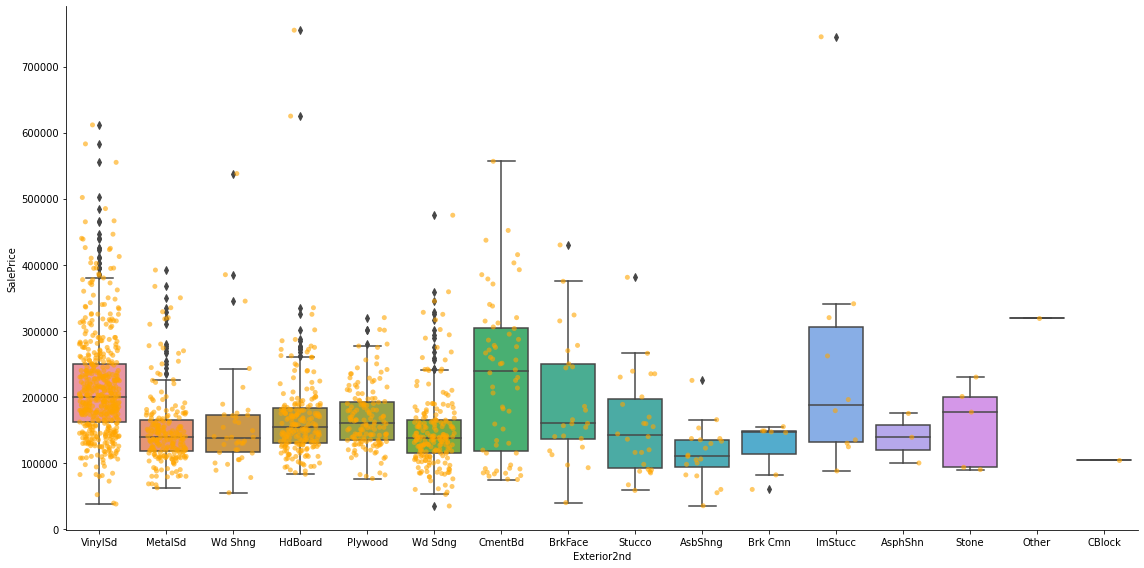

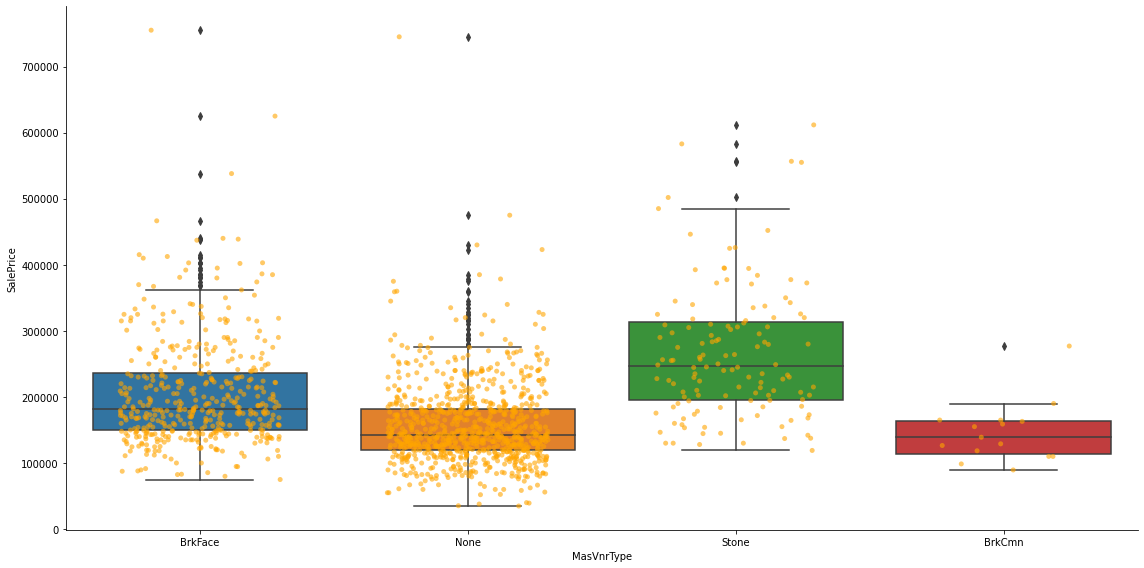

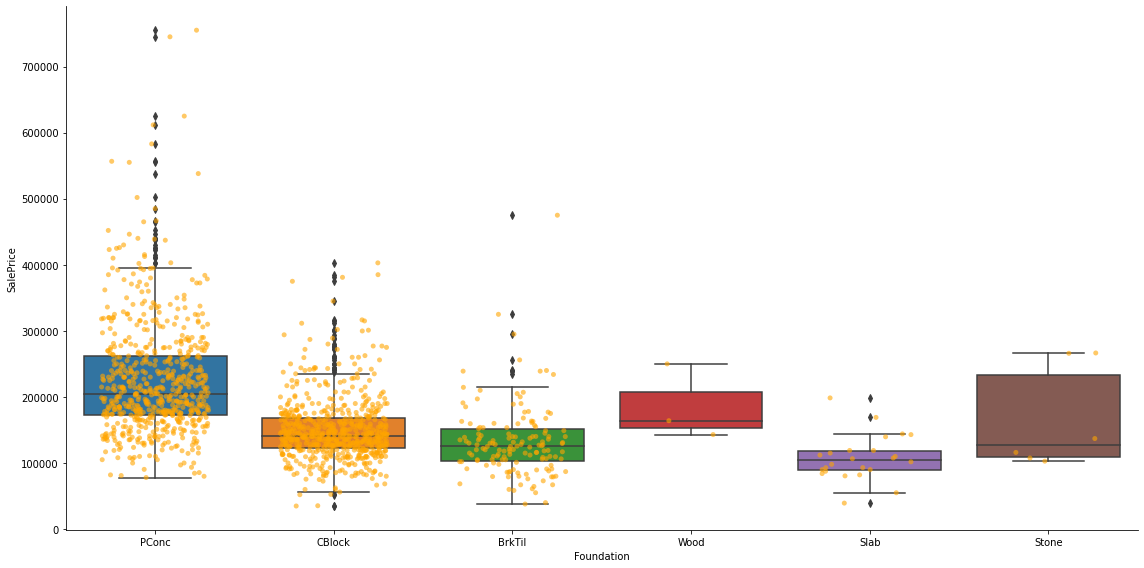

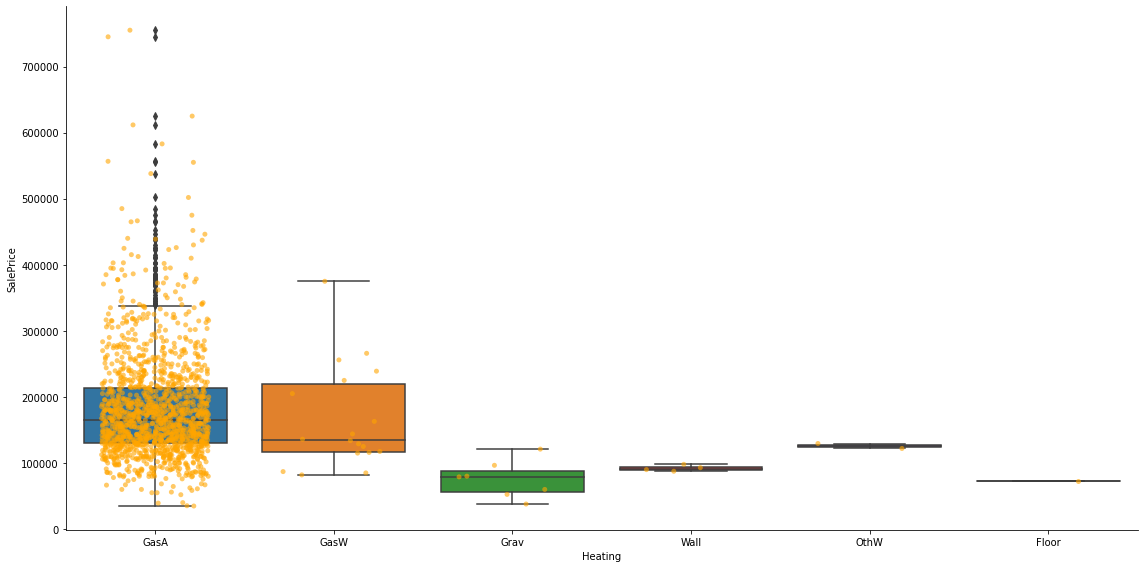

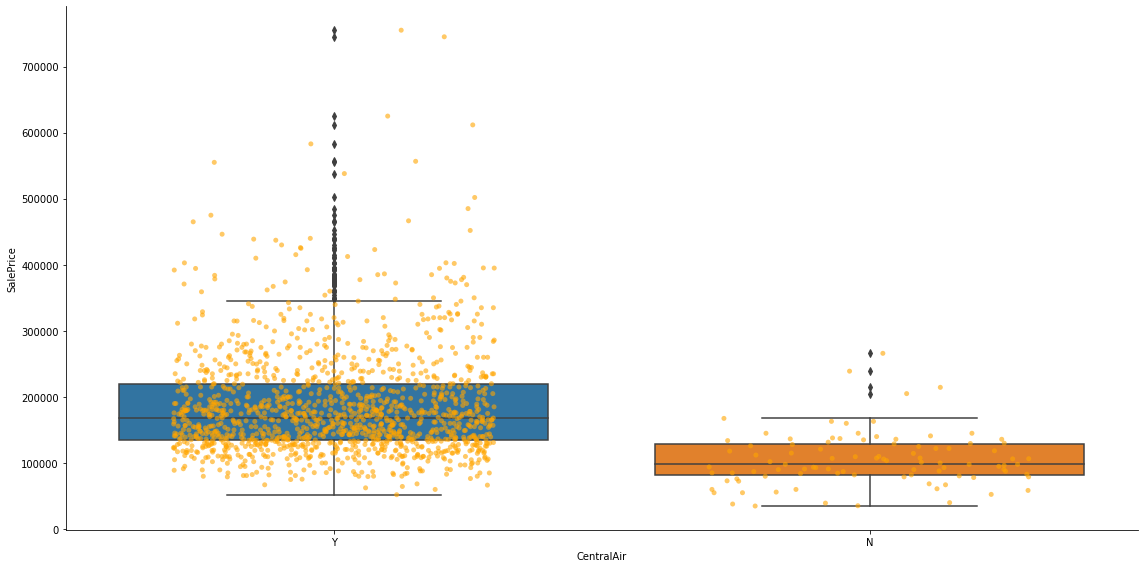

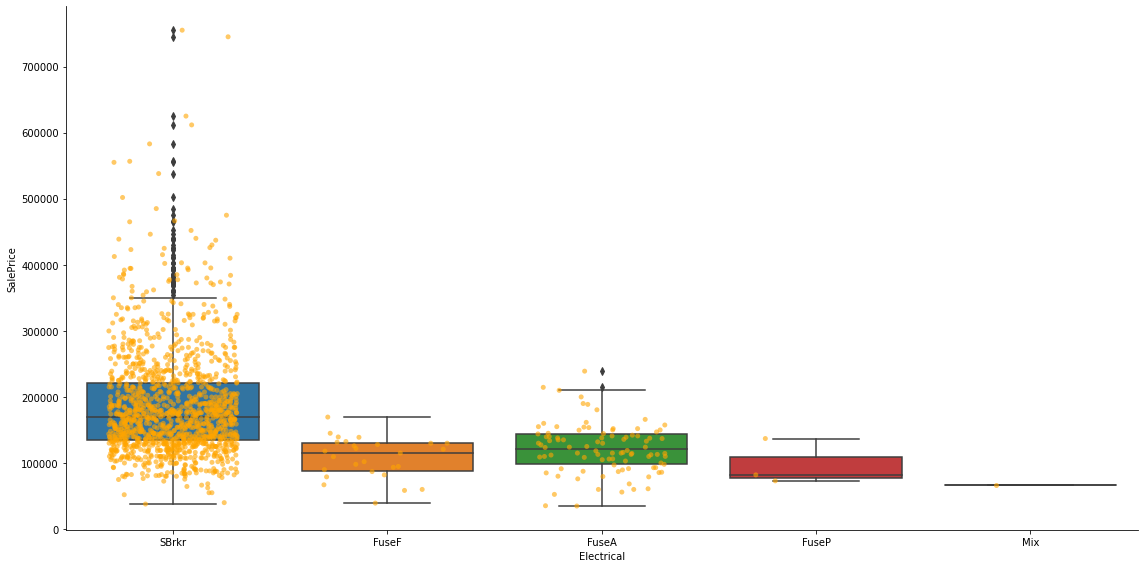

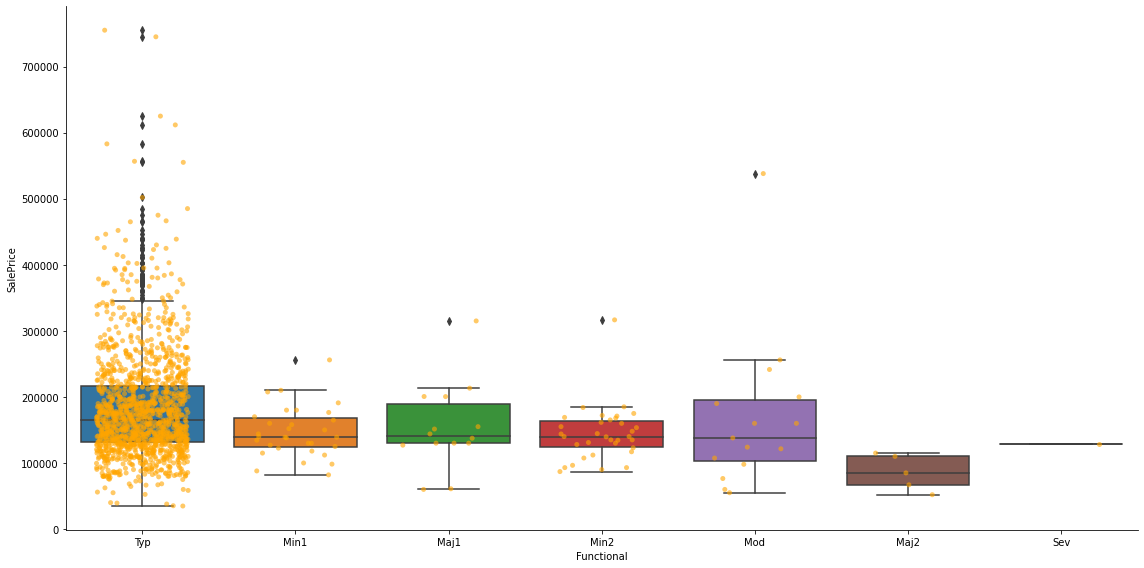

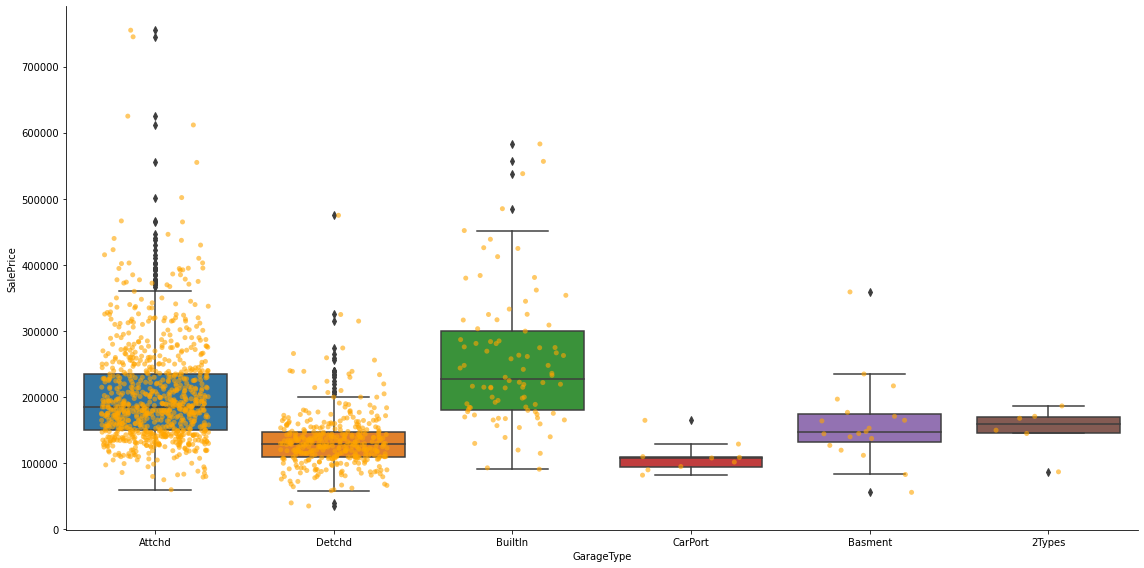

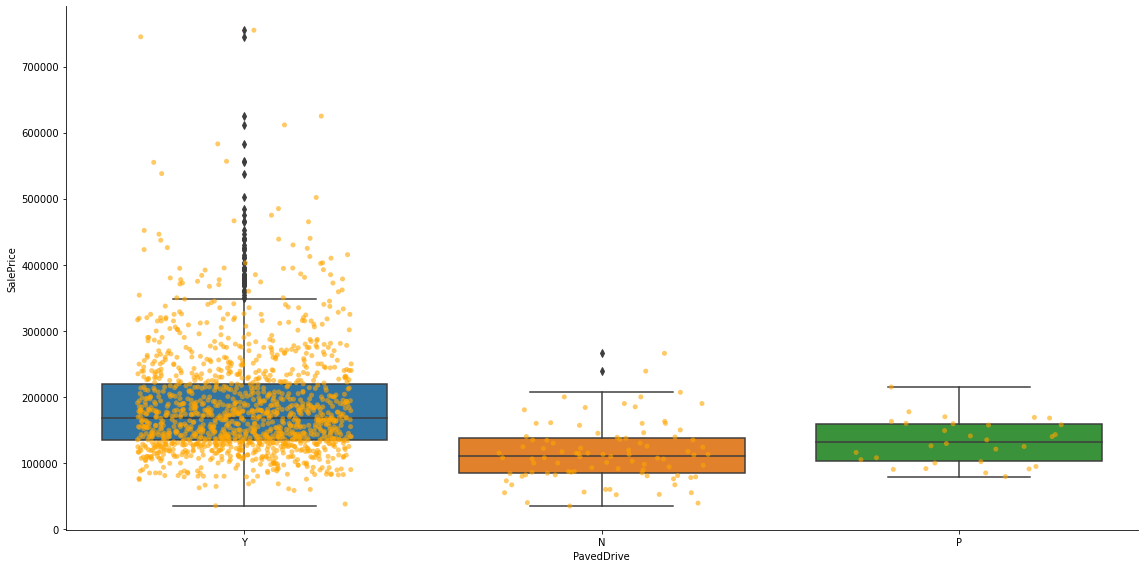

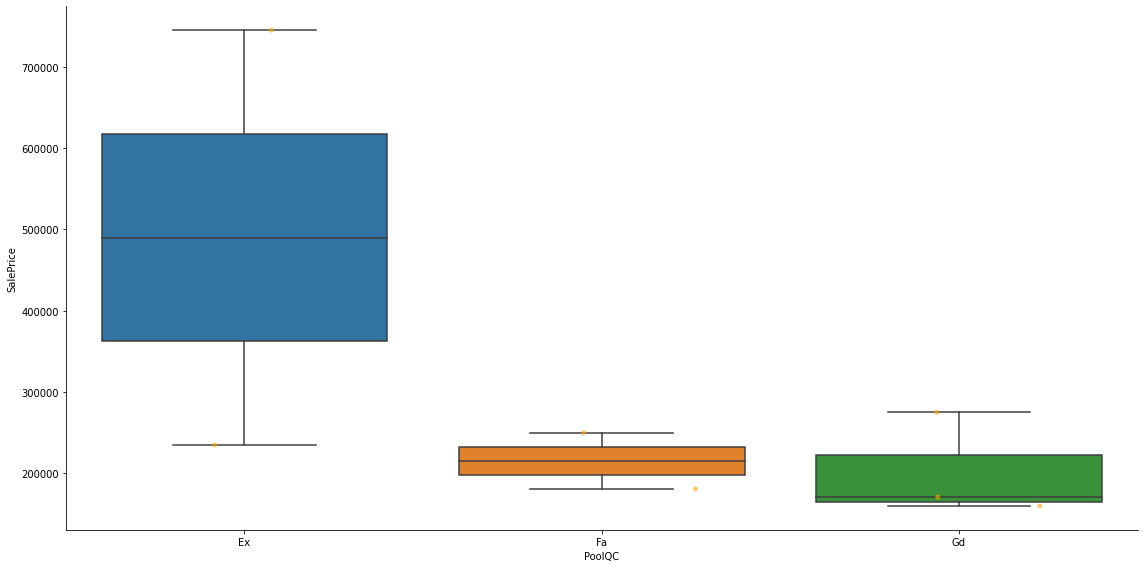

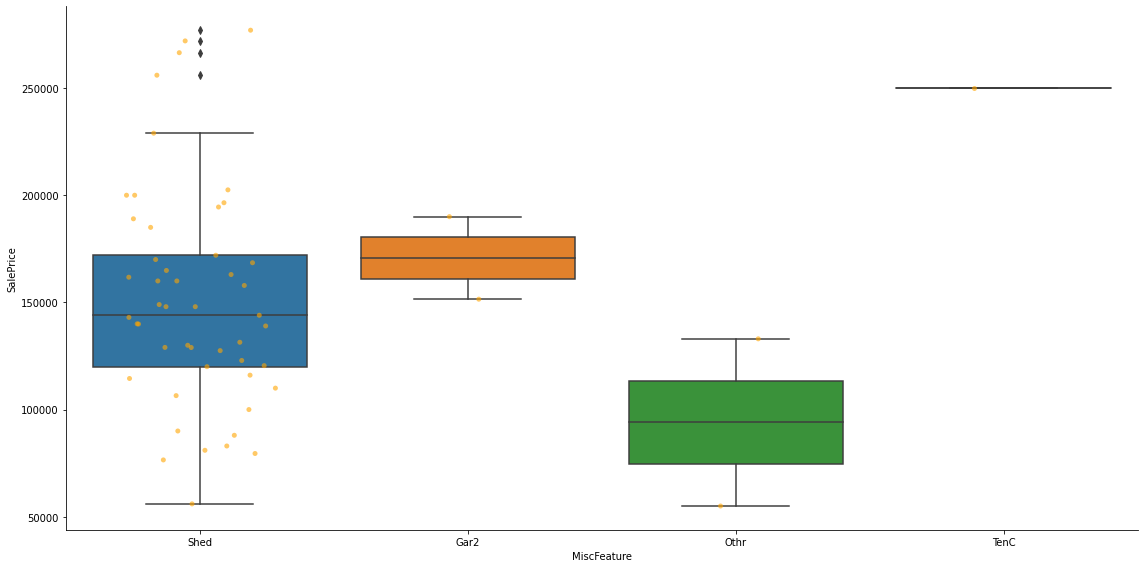

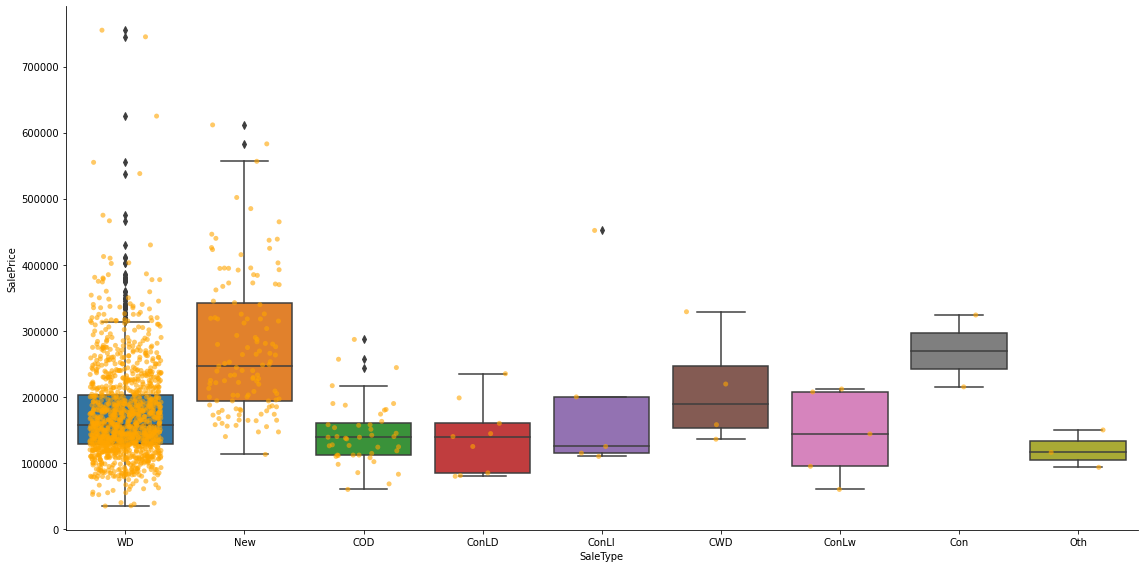

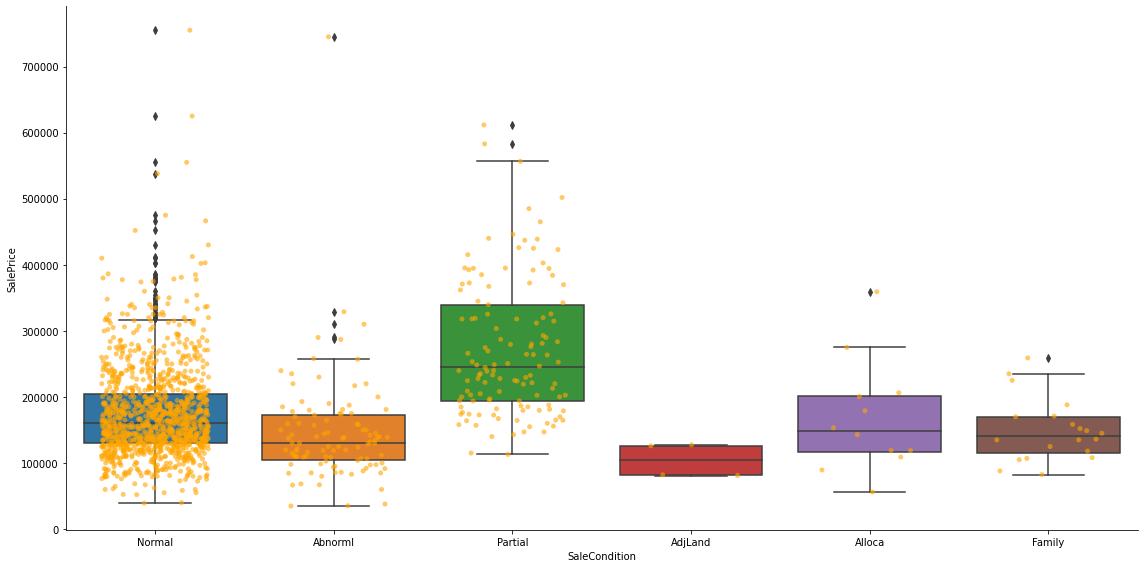

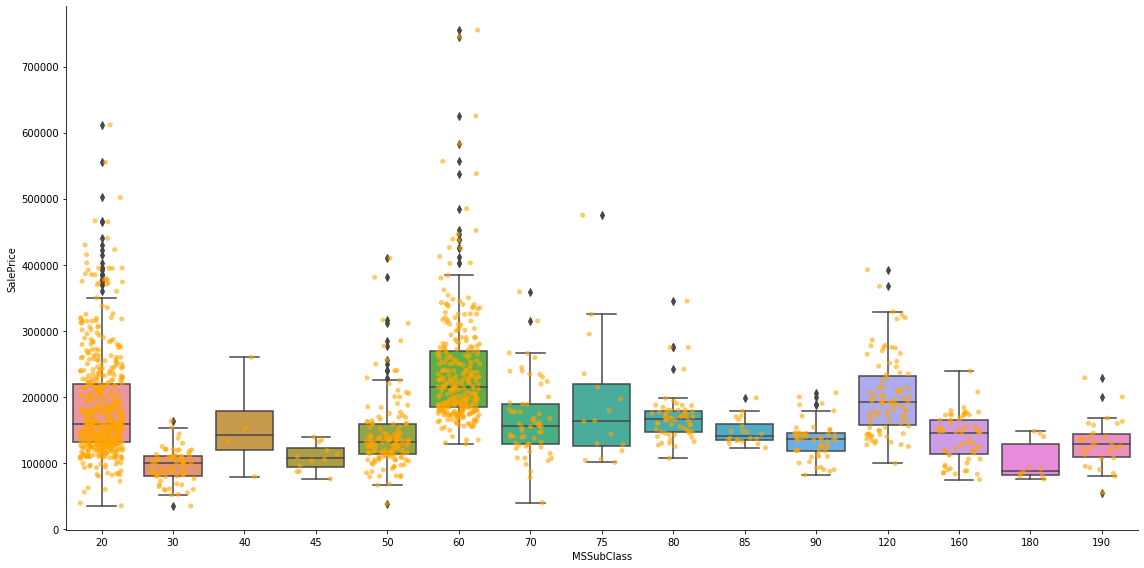

In [209]:
for var in cat_others:
    #plotting boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=8, aspect=2)
    
    #adding data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.3, alpha=0.6, color='orange')
    plt.show()

**`Obsevation:`**
Categories give information on SalePrice, as different categories show different median sale prices


This Data Analysis is almost 10 to 20 of all EDA, there can be infinite exploration criteria, one need to understand when to stop exploring